## 1. Import Libraries

### Importing Libraries for Advanced Model Development

1. **Core Libraries**:
   - **`numpy`**: Used for numerical computations, such as working with arrays and performing mathematical operations.
   - **`pandas`**: Essential for data manipulation and analysis, including handling DataFrames.

2. **Visualization**:
   - **`matplotlib.pyplot`**: Used for creating static, interactive, and animated visualizations.
   - **`seaborn`**: A higher-level visualization library built on Matplotlib, offering enhanced visual aesthetics and easier plotting.

3. **Machine Learning Tools**:
   - **`train_test_split`**: Splits the dataset into training and test sets for model evaluation.
   - **`GridSearchCV`**: A tool for hyperparameter optimization, performing an exhaustive search over a specified parameter grid.
   - **`RandomForestRegressor`**: An ensemble machine learning algorithm used for regression tasks, combining the predictions of multiple decision trees.

4. **Evaluation Metrics**:
   - **`mean_absolute_error`**: Measures the average magnitude of prediction errors.
   - **`r2_score`**: Represents the proportion of variance in the dependent variable that is predictable from the independent variables.

5. **Preprocessing and Pipelines**:
   - **`StandardScaler`**: Scales features to have zero mean and unit variance, helping some models converge faster.
   - **`OneHotEncoder`**: Converts categorical variables into a format that can be provided to ML algorithms, creating binary columns for each category.
   - **`ColumnTransformer`**: Applies different preprocessing transformations to specified columns, enabling combined handling of numerical and categorical features.
   - **`Pipeline`**: Allows chaining of preprocessing steps and model training into a single, streamlined workflow.

**Use Case**:
- These libraries set the foundation for building an advanced machine learning pipeline, enabling efficient feature preprocessing, model training, and hyperparameter tuning.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


## 2. Load Data

## 2. Load Data
In this section, we load the dataset containing historical data for predicting the estimated time of arrival (ETA) for DoorDash deliveries.

- The dataset is loaded using `pandas.read_csv()` and stored in a DataFrame called `df`.
- A preview of the dataset is displayed using `df.head()`.


In [2]:
df = pd.read_csv('/kaggle/input/doordash-eta-prediction/historical_data.csv')
df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0


## 3. Data Exploration
# Check for null values and data types

## 3. Data Exploration
This section begins the data exploration phase:

- Checks for null values and data types to understand data completeness and structure.
- Initial visualizations and descriptive statistics will provide insights into data distribution and relationships between variables.


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 16 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   market_id                                     196441 non-null  float64
 1   created_at                                    197428 non-null  object 
 2   actual_delivery_time                          197421 non-null  object 
 3   store_id                                      197428 non-null  int64  
 4   store_primary_category                        192668 non-null  object 
 5   order_protocol                                196433 non-null  float64
 6   total_items                                   197428 non-null  int64  
 7   subtotal                                      197428 non-null  int64  
 8   num_distinct_items                            197428 non-null  int64  
 9   min_item_price                                19

In [4]:
# Get descriptive statistics to understand the distribution of numerical features
df.describe()

,market_id,store_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
count,196441.000000,197428.000000,196433.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,181166.000000,181166.000000,181166.000000,197428.000000,196902.000000
mean,2.978706,3530.510272,2.882352,3.196391,2682.331402,2.670791,686.218470,1159.588630,44.808093,41.739747,58.050065,308.560179,545.358935
std,1.524867,2053.496711,1.503771,2.666546,1823.093688,1.630255,522.038648,558.411377,34.526783,32.145733,52.661830,90.139653,219.352902
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,-86.000000,0.000000,-4.000000,-5.000000,-6.000000,0.000000,0.000000
25%,2.000000,1686.000000,1.000000,2.000000,1400.000000,1.000000,299.000000,800.000000,17.000000,15.000000,17.000000,251.000000,382.000000
50%,3.000000,3592.000000,3.000000,3.000000,2200.000000,2.000000,595.000000,1095.000000,37.000000,34.000000,41.000000,251.000000,544.000000
75%,4.000000,5299.000000,4.000000,4.000000,3395.000000,3.000000,949.000000,1395.000000,65.000000,62.000000,85.000000,446.000000,702.000000
max,6.000000,6987.000000,7.000000,411.000000,27100.000000,20.000000,14700.000000,14700.000000,171.000000,154.000000,285.000000,2715.000000,2088.000000


In [5]:
df.isnull().sum()

market_id                                         987
created_at                                          0
actual_delivery_time                                7
store_id                                            0
store_primary_category                           4760
order_protocol                                    995
total_items                                         0
subtotal                                            0
num_distinct_items                                  0
min_item_price                                      0
max_item_price                                      0
total_onshift_dashers                           16262
total_busy_dashers                              16262
total_outstanding_orders                        16262
estimated_order_place_duration                      0
estimated_store_to_consumer_driving_duration      526
dtype: int64

## 4. Data Preprocessing
### 4.1 Convert Date Columns

### Converting Columns to Datetime Format

1. **Converting to Datetime**:
   - **`df['created_at'] = pd.to_datetime(df['created_at'])`**: Converts the `created_at` column in the DataFrame to the datetime format. This ensures that the dates are interpreted correctly for further analysis or manipulation.
   - **`df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'])`**: Similarly, the `actual_delivery_time` column is converted to the datetime format.

2. **Checking DataFrame Information**:
   - **`df.info()`**: This command provides a summary of the DataFrame, including the data types and the number of non-null entries for each column. This helps confirm that the datetime conversion was successful and to check if there are any missing values.

**Interpretation**:
- By converting these columns to datetime format, you can perform time-based analysis, such as calculating time differences or extracting specific time-related features (e.g., day, month, year, hour).
- **`df.info()`** provides a quick overview of the dataset's structure, confirming the correct data types and helping to identify any issues such as missing data or incorrect formatting.


In [6]:
df['created_at'] = pd.to_datetime(df['created_at'])
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 16 columns):
 #   Column                                        Non-Null Count   Dtype         
---  ------                                        --------------   -----         
 0   market_id                                     196441 non-null  float64       
 1   created_at                                    197428 non-null  datetime64[ns]
 2   actual_delivery_time                          197421 non-null  datetime64[ns]
 3   store_id                                      197428 non-null  int64         
 4   store_primary_category                        192668 non-null  object        
 5   order_protocol                                196433 non-null  float64       
 6   total_items                                   197428 non-null  int64         
 7   subtotal                                      197428 non-null  int64         
 8   num_distinct_items                            197428 n

### 4.2 Feature Engineering

### Creating New Features for Analysis

1. **Calculating Delivery Duration**:
   - **`df['delivery_duration'] = (df['actual_delivery_time'] - df['created_at']).dt.total_seconds()`**:
     - This new column calculates the duration between the `created_at` and `actual_delivery_time` columns in seconds.
     - **`.dt.total_seconds()`** converts the time difference into total seconds, providing a numerical representation of how long the delivery took.
   - The first few rows of the DataFrame are displayed using **`df.head()`** to check the result of this calculation.

2. **Calculating Estimated Non-Preparation Duration**:
   - **`df['estimated_non_prep_duration'] = df['estimated_store_to_consumer_driving_duration'] + df['estimated_order_place_duration']`**:
     - This feature represents the total estimated time taken for non-preparation activities, which combines the estimated driving duration and order placement duration.
   - Again, **`df.head()`** is used to inspect the first few rows of the updated DataFrame.

3. **Calculating Busy Dashers Ratio**:
   - **`df['busy_dashers_ratio'] = df['total_busy_dashers'] / df['total_onshift_dashers']`**:
     - This feature calculates the ratio of busy dashers to total dashers, giving an indication of how many dashers are occupied at any given time.
   - **`df.head()`** is used to verify the new feature.

**Interpretation**:
- **`delivery_duration`** helps track the actual time taken for deliveries, which is useful for analyzing delivery efficiency.
- **`estimated_non_prep_duration`** combines estimated driving and order placement times, allowing for further analysis of non-preparation factors affecting delivery time.
- **`busy_dashers_ratio`** indicates the availability of dashers, which could help in understanding delivery delays or optimizing the dasher allocation.


In [7]:
from datetime import datetime

df['delivery_duration'] = (df['actual_delivery_time'] - df['created_at']).dt.total_seconds()
df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,delivery_duration
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0,3779.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0,4024.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0,1781.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0,3075.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0,2390.0


In [8]:
df['estimated_non_prep_duration'] = df['estimated_store_to_consumer_driving_duration'] + df['estimated_order_place_duration']
df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,delivery_duration,estimated_non_prep_duration
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0,3779.0,1307.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0,4024.0,1136.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0,1781.0,1136.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0,3075.0,735.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0,2390.0,1096.0


In [9]:
df['busy_dashers_ratio'] = df['total_busy_dashers'] / df['total_onshift_dashers']
df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,delivery_duration,estimated_non_prep_duration,busy_dashers_ratio
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0,3779.0,1307.0,0.424242
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0,4024.0,1136.0,2.000000
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0,1781.0,1136.0,0.000000
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0,3075.0,735.0,1.000000
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0,2390.0,1096.0,1.000000


In [10]:
df[df['busy_dashers_ratio'] > 1]

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,delivery_duration,estimated_non_prep_duration,busy_dashers_ratio
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0,4024.0,1136.0,2.000000
7,3.0,2015-02-12 03:03:35,2015-02-12 03:36:20,5477,NaN,1.0,4,4850,4,750,1800,7.0,8.0,7.0,446,626.0,1965.0,1072.0,1.142857
14,1.0,2015-02-12 03:36:46,2015-02-12 04:14:39,2841,italian,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,446,795.0,2273.0,1241.0,1.200000
18,1.0,2015-01-31 04:35:54,2015-01-31 05:47:30,2841,italian,1.0,2,3150,2,1425,1725,4.0,9.0,12.0,446,548.0,4296.0,994.0,2.250000
20,1.0,2015-01-31 23:45:12,2015-02-01 00:14:05,4139,mexican,1.0,5,1285,3,150,400,12.0,13.0,11.0,446,424.0,1733.0,870.0,1.083333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197411,1.0,2015-02-02 17:50:23,2015-02-02 18:12:57,2956,fast,4.0,2,1297,2,369,639,5.0,6.0,7.0,251,186.0,1354.0,437.0,1.200000
197412,1.0,2015-02-10 23:43:08,2015-02-11 00:47:24,2956,fast,4.0,1,674,1,345,345,10.0,11.0,12.0,251,706.0,3856.0,957.0,1.100000
197418,1.0,2015-01-30 20:50:23,2015-01-30 22:24:38,2956,fast,4.0,2,1528,2,639,729,26.0,29.0,34.0,251,791.0,5655.0,1042.0,1.115385
197422,1.0,2015-01-31 19:48:15,2015-01-31 20:27:39,2956,fast,4.0,7,2445,3,145,585,23.0,24.0,24.0,251,608.0,2364.0,859.0,1.043478


### Mapping Store ID to Primary Category

1. **Extracting Unique Store IDs**:
   - **`store_id_unique = df['store_id'].unique().tolist()`**: This command retrieves a list of unique store IDs from the `store_id` column. It helps identify all the distinct stores in the dataset.

2. **Creating a Dictionary of Store IDs and Categories**:
   - **`store_id_and_category = {store_id: df[df.store_id == store_id].store_primary_category.mode() for store_id in store_id_unique}`**:
     - This line creates a dictionary where:
       - The keys are the unique store IDs (`store_id_unique`).
       - The values are the most common value (mode) from the `store_primary_category` column for each store.
     - **`df[df.store_id == store_id]`** filters the rows corresponding to a specific store ID.
     - **`.store_primary_category.mode()`** finds the most frequent store category for each store.
   
3. **Result**:
   - The resulting dictionary (`store_id_and_category`) maps each store ID to its most common primary category. This is useful for further analysis, such as understanding the relationship between store categories and delivery times.

**Interpretation**:
- This mapping can help analyze the relationship between different store types and delivery performance, and can be used to segment the dataset based on store categories in further predictive modeling.


In [11]:
store_id_unique = df['store_id'].unique().tolist()
store_id_and_category = {store_id: df[df.store_id == store_id].store_primary_category.mode() for store_id in store_id_unique}

### Filling Missing Values for Store Primary Category

1. **Defining the `fill` Function**:
   - **`def fill(store_id):`**: A function is defined to return the primary store category for a given store ID.
   - **`return store_id_and_category[store_id].values[0]`**: The function tries to fetch the primary store category for the given `store_id` from the previously created `store_id_and_category` dictionary. The `.values[0]` retrieves the mode (most common value) of the `store_primary_category`.
   - **`except:`**: If the store ID is not found in the dictionary (which might happen for missing or new store IDs), the function returns `np.nan` to handle the case where the data is not available.

2. **Applying the `fill` Function to the DataFrame**:
   - **`df['free_store_primary_category'] = df.store_id.apply(fill)`**: This line applies the `fill` function to the `store_id` column in the DataFrame, creating a new column `free_store_primary_category` where the missing store categories are filled based on the store ID.
     - **`apply(fill)`** applies the function to each row in the `store_id` column.

3. **Result**:
   - The new column `free_store_primary_category` is populated with the primary store categories for each store, with `np.nan` for rows where the store category could not be determined from the dictionary.

**Interpretation**:
- This approach fills missing store categories with the most frequent category associated with each store ID. This is useful in maintaining data consistency and ensuring that missing values do not affect analysis or modeling.
- **`np.nan`** is used to handle cases where the store category is unavailable or the store ID does not exist in the mapping.


In [12]:
def fill(store_id):
    """Return primary store catoegory from dictionary"""
    try:
        return store_id_and_category[store_id].values[0]
    except:
        return np.nan

# fill null values
df['free_store_primary_category'] = df.store_id.apply(fill)

In [13]:
df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,delivery_duration,estimated_non_prep_duration,busy_dashers_ratio,free_store_primary_category
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0,3779.0,1307.0,0.424242,american
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0,4024.0,1136.0,2.000000,indian
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0,1781.0,1136.0,0.000000,indian
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0,3075.0,735.0,1.000000,indian
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0,2390.0,1096.0,1.000000,indian


### Accessing the Category for Store ID 5477

The command `store_id_and_category[5477]` will return the most common primary store category for store ID `5477` from the previously created dictionary `store_id_and_category`.

- The dictionary `store_id_and_category` maps store IDs to the most frequent primary store category for each store. So, by accessing `store_id_and_category[5477]`, you are retrieving the primary category for store ID `5477`.
- The output will return a **pandas Series** containing the most frequent category for that store ID.

If there are no categories associated with store ID `5477`, it might return an empty Series or `NaN` if there is no valid data in the dictionary for that store.

**Interpretation**:
- This command helps retrieve the primary store category for a given store ID, which can be used for filling missing values or performing store-specific analyses.


In [14]:
store_id_and_category[5477]

0     indian
1    mexican
Name: store_primary_category, dtype: object

### Filtering the DataFrame for Store ID 5477

The command **`df[df.store_id == 5477]`** filters the DataFrame `df` to return all rows where the `store_id` is equal to `5477`.

- **`df.store_id == 5477`** creates a boolean mask that is `True` for rows where the `store_id` equals `5477` and `False` for other rows.
- **`df[...]`** applies this mask to the DataFrame, selecting only the rows where the condition is `True`.

**Result**:
- This will return a DataFrame containing all the data for store ID `5477`. It includes all columns and rows where the `store_id` matches `5477`.
- You can use this filtered data to analyze or inspect the behavior or details of this particular store.

**Example Usage**:
- This filtering can be helpful when you want to analyze or visualize data specific to a particular store, such as its delivery times, order protocols, or any other variables in the dataset.


In [15]:
df[df.store_id == 5477]

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,delivery_duration,estimated_non_prep_duration,busy_dashers_ratio,free_store_primary_category
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0,4024.0,1136.0,2.000000,indian
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0,1781.0,1136.0,0.000000,indian
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0,3075.0,735.0,1.000000,indian
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0,2390.0,1096.0,1.000000,indian
5,3.0,2015-01-28 20:30:38,2015-01-28 21:08:58,5477,NaN,1.0,3,5000,3,1500,1900,2.0,2.0,2.0,446,338.0,2300.0,784.0,1.000000,indian
6,3.0,2015-01-31 02:16:36,2015-01-31 02:43:00,5477,NaN,1.0,2,3900,2,1200,2700,10.0,9.0,9.0,446,638.0,1584.0,1084.0,0.900000,indian
7,3.0,2015-02-12 03:03:35,2015-02-12 03:36:20,5477,NaN,1.0,4,4850,4,750,1800,7.0,8.0,7.0,446,626.0,1965.0,1072.0,1.142857,indian
8,2.0,2015-02-16 00:11:35,2015-02-16 00:38:01,5477,indian,3.0,4,4771,3,820,1604,8.0,6.0,18.0,446,289.0,1586.0,735.0,0.750000,indian
9,3.0,2015-02-18 01:15:45,2015-02-18 02:08:57,5477,NaN,1.0,2,2100,2,700,1200,2.0,2.0,2.0,446,715.0,3192.0,1161.0,1.000000,indian
10,3.0,2015-02-02 19:22:53,2015-02-02 20:09:19,5477,NaN,4.0,4,4300,4,1200,1500,1.0,1.0,1.0,446,453.0,2786.0,899.0,1.000000,indian


### Creating Dummy Variables for the Order Protocol

1. **Generating Dummy Variables**:
   - **`order_protocol_dummies = pd.get_dummies(df.order_protocol)`**: This line creates dummy variables for the `order_protocol` column in the DataFrame.
     - **`pd.get_dummies()`** automatically converts categorical values in `order_protocol` into separate binary columns, each representing a unique category of the `order_protocol`.
     - For example, if there are categories like "online" and "in-store", two new columns would be created: one for each of these categories, with values 0 or 1 indicating the presence of that category.

2. **Renaming the Columns**:
   - **`order_protocol_dummies = order_protocol_dummies.add_prefix('order_protocol_')`**: This adds a prefix `order_protocol_` to the names of the new dummy columns, making it easier to identify them in the dataset.
     - For example, the dummy columns might be named `order_protocol_online` and `order_protocol_in-store`.

3. **Displaying the Result**:
   - **`order_protocol_dummies.head()`**: This command displays the first few rows of the `order_protocol_dummies` DataFrame to verify that the dummy variables have been correctly created.

**Interpretation**:
- Dummy variables are essential for converting categorical data into a numerical format that can be used in machine learning models. 
- By adding the prefix `order_protocol_`, the columns are clearly labeled, which is important for maintaining clarity in the data during analysis and modeling.


In [16]:
# create dummies for order protocol
order_protocol_dummies = pd.get_dummies(df.order_protocol)
order_protocol_dummies = order_protocol_dummies.add_prefix('order_protocol_')
order_protocol_dummies.head()

,order_protocol_1.0,order_protocol_2.0,order_protocol_3.0,order_protocol_4.0,order_protocol_5.0,order_protocol_6.0,order_protocol_7.0
0,True,False,False,False,False,False,False
1,False,True,False,False,False,False,False
2,True,False,False,False,False,False,False
3,True,False,False,False,False,False,False
4,True,False,False,False,False,False,False


### Converting Boolean Values (True/False) to Integer (1/0) in Order Protocol Dummies

1. **Converting Boolean to Integer**:
   - **`order_protocol_dummies = order_protocol_dummies.astype(int)`**: This line converts the values in the `order_protocol_dummies` DataFrame from boolean values (`True/False`) to integer values (`1/0`).
     - By default, `get_dummies` produces boolean values, where `True` is represented as `1` and `False` as `0`. 
     - The **`astype(int)`** method casts these boolean values into integers (`1` for `True` and `0` for `False`).

2. **Displaying the Result**:
   - **`order_protocol_dummies.head()`**: This command displays the first few rows of the `order_protocol_dummies` DataFrame to confirm the conversion from boolean to integers.

**Interpretation**:
- Converting `True/False` to `1/0` is necessary because machine learning algorithms generally require numerical data to make predictions or perform computations. 
- This ensures that the dummy variables are in a format compatible with models such as linear regression, decision trees, and other machine learning algorithms.


In [17]:
# convert True/False to 1/0 in order protocol dummies
order_protocol_dummies = order_protocol_dummies.astype(int)
order_protocol_dummies.head()

,order_protocol_1.0,order_protocol_2.0,order_protocol_3.0,order_protocol_4.0,order_protocol_5.0,order_protocol_6.0,order_protocol_7.0
0,1,0,0,0,0,0,0
1,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0


### Creating Dummy Variables for Market ID

1. **Generating Dummy Variables**:
   - **`market_id_dummies = pd.get_dummies(df.market_id)`**: This command generates dummy variables for the `market_id` column in the DataFrame `df`.
     - **`pd.get_dummies()`** transforms the categorical values of `market_id` into separate binary columns, each representing a unique category of `market_id`.
     - For example, if the `market_id` column has categories like "A", "B", and "C", three new columns will be created, such as `market_id_A`, `market_id_B`, and `market_id_C`. Each column will contain `1` if that market ID is present for the corresponding row, and `0` if not.

2. **Renaming Columns**:
   - **`market_id_dummies = market_id_dummies.add_prefix('market_id_')`**: Adds the prefix `market_id_` to the new columns, making them easy to identify.
     - For example, columns might be renamed to `market_id_A`, `market_id_B`, etc.

3. **Converting to Integer**:
   - **`market_id_dummies = market_id_dummies.astype(int)`**: Converts the `True/False` values (produced by `pd.get_dummies()`) into `1/0` by using **`astype(int)`**.
     - This is necessary because machine learning algorithms require numeric inputs, and `1/0` values are commonly used in modeling.

4. **Displaying the Result**:
   - **`market_id_dummies.head()`**: Displays the first few rows of the newly created dummy variables for `market_id` to verify that the conversion has been applied correctly.

**Interpretation**:
- Dummy variables are essential for converting categorical variables into a numerical format suitable for machine learning models. 
- Adding a prefix helps maintain clarity, and converting `True/False` to `1/0` ensures the data can be used for analysis or predictive modeling.
- The result is a DataFrame with binary columns representing the different categories of `market_id`.


In [18]:
# create dummies for market id
market_id_dummies = pd.get_dummies(df.market_id)
market_id_dummies = market_id_dummies.add_prefix('market_id_')
market_id_dummies = market_id_dummies.astype(int)
market_id_dummies.head()

,market_id_1.0,market_id_2.0,market_id_3.0,market_id_4.0,market_id_5.0,market_id_6.0
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,1,0,0,0
3,0,0,1,0,0,0
4,0,0,1,0,0,0


### Creating Dummy Variables for Store Primary Category

1. **Generating Dummy Variables**:
   - **`store_primary_category_dummies = pd.get_dummies(df.free_store_primary_category)`**: This command generates dummy variables for the `free_store_primary_category` column in the DataFrame `df`.
     - **`pd.get_dummies()`** converts the categorical values in `free_store_primary_category` (which contains store categories) into separate binary columns.
     - For example, if the store categories are "Grocery", "Restaurant", and "Electronics", the command will create three columns: `category_Grocery`, `category_Restaurant`, and `category_Electronics`. Each row will contain a `1` in the column corresponding to the store's category, and `0` otherwise.

2. **Renaming Columns**:
   - **`store_primary_category_dummies = store_primary_category_dummies.add_prefix('category_')`**: This adds the prefix `category_` to each column name, making it clear that these columns represent store categories.
     - For example, the columns will now be named `category_Grocery`, `category_Restaurant`, and `category_Electronics`.

3. **Converting to Integer**:
   - **`store_primary_category_dummies = store_primary_category_dummies.astype(int)`**: This converts the `True/False` values (which were created by `pd.get_dummies()`) into `1/0` using **`astype(int)`**.
     - This step ensures that the columns are in a numeric format, which is required for machine learning models.

4. **Displaying the Result**:
   - **`store_primary_category_dummies.head()`**: This command displays the first few rows of the newly created dummy variables to verify that the conversion has been applied correctly.

**Interpretation**:
- Dummy variables allow you to convert categorical variables (like store categories) into a format that machine learning models can use.
- Adding a prefix (`category_`) to each column makes the new columns easier to identify and understand.
- Converting the boolean values (`True/False`) to integers (`1/0`) ensures that the data is numeric, which is necessary for most machine learning algorithms.
- The resulting DataFrame now contains columns for each store category, where each row is marked with `1` in the column corresponding to the store's category.


In [19]:
# create dummies for store primary category
store_primary_category_dummies = pd.get_dummies(df.free_store_primary_category)
store_primary_category_dummies = store_primary_category_dummies.add_prefix('category_')
store_primary_category_dummies = store_primary_category_dummies.astype(int)
store_primary_category_dummies.head()

,category_afghan,category_african,category_alcohol,category_alcohol-plus-food,category_american,category_argentine,category_asian,category_barbecue,category_belgian,category_brazilian,...,category_southern,category_spanish,category_steak,category_sushi,category_tapas,category_thai,category_turkish,category_vegan,category_vegetarian,category_vietnamese
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Dropping Unnecessary Columns

1. **Dropping Columns**:
   - **`train_df = df.drop(columns=['created_at', 'market_id', 'store_id', 'store_primary_category', 'actual_delivery_time', 'free_store_primary_category', 'order_protocol'])`**: This command drops several columns from the original DataFrame `df` to create a new DataFrame `train_df`. The columns being dropped include:
     - `created_at`: The timestamp when the order was created.
     - `market_id`: The market ID, which may no longer be needed after dummy encoding.
     - `store_id`: The unique identifier for stores, which is no longer needed after encoding.
     - `store_primary_category`: The original store category, as this information has been encoded into dummies.
     - `actual_delivery_time`: The timestamp of the actual delivery time, which is likely part of the target variable or redundant.
     - `free_store_primary_category`: The filled store category, already incorporated into the dummy variables.
     - `order_protocol`: The order protocol, which has been encoded into dummy variables.
   
2. **Creating the New DataFrame**:
   - **`train_df.head()`**: This command displays the first few rows of the newly created DataFrame `train_df` to verify the results. The columns that were dropped will no longer appear in the DataFrame.

**Interpretation**:
- Dropping unnecessary columns helps reduce the complexity of the data and ensures that only relevant features are used for model training.
- By removing columns that are either redundant or already represented as encoded variables (like dummy variables), the dataset becomes cleaner and easier to process for machine learning algorithms.
- The `train_df` now contains only the features that are needed for model building, with categorical variables represented as dummies and irrelevant columns removed.


In [20]:
# dropping unnecessary columns
train_df = df.drop(columns=['created_at', 'market_id', 'store_id', 'store_primary_category', 'actual_delivery_time',
                                         'free_store_primary_category', 'order_protocol'])
train_df.head()

,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,delivery_duration,estimated_non_prep_duration,busy_dashers_ratio
0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0,3779.0,1307.0,0.424242
1,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0,4024.0,1136.0,2.000000
2,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0,1781.0,1136.0,0.000000
3,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0,3075.0,735.0,1.000000
4,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0,2390.0,1096.0,1.000000


### Combining Dummy Variables with the Main DataFrame and Ensuring Consistent Data Types

1. **Concatenating Dummy Variables**:
   - **`train_df = pd.concat([train_df, order_protocol_dummies, market_id_dummies, store_primary_category_dummies], axis=1)`**:
     - This command combines the original `train_df` DataFrame with the dummy variable DataFrames: `order_protocol_dummies`, `market_id_dummies`, and `store_primary_category_dummies`.
     - **`axis=1`** indicates that the concatenation is happening along the columns (i.e., horizontally), adding the dummy variables to the original DataFrame.
     - This step ensures that the categorical features (`order_protocol`, `market_id`, `store_primary_category`) are represented as numerical columns using the dummy variables, which are now part of the `train_df`.

2. **Aligning Data Types**:
   - **`train_df = train_df.astype("float32")`**:
     - This command ensures that the entire `train_df` DataFrame has a consistent data type of `float32`. 
     - **`float32`** is commonly used in machine learning models because it provides a good balance between memory efficiency and precision.
     - Converting to `float32` also helps with memory management, especially when dealing with large datasets.
   
3. **Displaying the Result**:
   - **`train_df.head()`**: This displays the first few rows of the updated `train_df` DataFrame, which now contains the original features along with the newly created dummy variables and all columns set to the `float32` data type.

**Interpretation**:
- Concatenating the dummy variables with the original features enables the use of categorical information in the model, now encoded in a numerical format.
- Aligning the data types to `float32` ensures consistent and memory-efficient data representation, which is important when preparing the dataset for machine learning tasks.
- The resulting `train_df` is now ready for model training, with appropriate data types and necessary features.


In [21]:
train_df = pd.concat([train_df, order_protocol_dummies, market_id_dummies, store_primary_category_dummies], axis=1)

# align dtype over dataset
train_df = train_df.astype("float32")
train_df.head()

,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,...,category_southern,category_spanish,category_steak,category_sushi,category_tapas,category_thai,category_turkish,category_vegan,category_vegetarian,category_vietnamese
0,4.0,3441.0,4.0,557.0,1239.0,33.0,14.0,21.0,446.0,861.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1900.0,1.0,1400.0,1400.0,1.0,2.0,2.0,446.0,690.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1900.0,1.0,1900.0,1900.0,1.0,0.0,0.0,446.0,690.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6.0,6900.0,5.0,600.0,1800.0,1.0,1.0,2.0,446.0,289.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.0,3900.0,3.0,1100.0,1600.0,6.0,6.0,9.0,446.0,650.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Exploring the Final Dataset

1. **Descriptive Statistics for the Entire Dataset**:
   - **`train_df.describe()`**: This command generates descriptive statistics for all numerical columns in the `train_df` DataFrame.
     - It provides the count, mean, standard deviation, minimum, 25th percentile, median (50th percentile), 75th percentile, and maximum values for each numerical column.
     - This summary is useful for getting a quick overview of the data distribution and identifying any potential anomalies or outliers.

2. **Descriptive Statistics for `busy_dashers_ratio`**:
   - **`train_df['busy_dashers_ratio'].describe()`**: This command generates descriptive statistics specifically for the `busy_dashers_ratio` column in the `train_df` DataFrame.
     - This will help understand the distribution of the busy dashers ratio and check for any extreme values or imbalances in the dataset related to this feature.
   
**Interpretation**:
- The output of **`train_df.describe()`** helps identify if any variables have unusual ranges or distributions that might need further cleaning or transformation.
- For **`train_df['busy_dashers_ratio'].describe()`**, you'll be able to observe the typical range of this ratio and check if it is skewed, if there are missing values, or if the data is imbalanced.
- Overall, these commands are crucial for understanding the statistical characteristics of the data and ensuring its readiness for machine learning modeling.


In [22]:
# checking the final dataset
train_df.describe()

/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:49: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,...,category_southern,category_spanish,category_steak,category_sushi,category_tapas,category_thai,category_turkish,category_vegan,category_vegetarian,category_vietnamese
count,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,181166.000000,181166.000000,181166.000000,197428.000000,196902.000000,...,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000
mean,3.196391,2682.331543,2.670791,686.218506,1159.588623,44.808094,41.739746,58.050064,308.560181,545.358948,...,0.000815,0.000187,0.005465,0.011300,0.000740,0.037254,0.001175,0.001433,0.004234,0.030928
std,2.666546,1823.093750,1.630255,522.038635,558.411377,34.526787,32.145733,52.661831,90.139648,219.352905,...,0.028545,0.013689,0.073725,0.105701,0.027184,0.189384,0.034260,0.037834,0.064935,0.173122
min,1.000000,0.000000,1.000000,-86.000000,0.000000,-4.000000,-5.000000,-6.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1400.000000,1.000000,299.000000,800.000000,17.000000,15.000000,17.000000,251.000000,382.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,2200.000000,2.000000,595.000000,1095.000000,37.000000,34.000000,41.000000,251.000000,544.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,3395.000000,3.000000,949.000000,1395.000000,65.000000,62.000000,85.000000,446.000000,702.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,411.000000,27100.000000,20.000000,14700.000000,14700.000000,171.000000,154.000000,285.000000,2715.000000,2088.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [23]:
train_df['busy_dashers_ratio'].describe()

/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:49: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


count    1.775900e+05
mean              NaN
std               NaN
min              -inf
25%      8.269231e-01
50%      9.622642e-01
75%      1.000000e+00
max               inf
Name: busy_dashers_ratio, dtype: float64

### Handling Infinite Values and Missing Data

1. **Replacing Infinite Values with NaN**:
   - **`train_df.replace([np.inf, -np.inf], np.nan, inplace=True)`**:
     - This command replaces all infinite values (both positive infinity `np.inf` and negative infinity `-np.inf`) in the `train_df` DataFrame with `NaN` (Not a Number).
     - Infinite values can arise in some computations, such as dividing by zero, and are not suitable for machine learning models. Replacing them with `NaN` makes it easier to handle them in the next step.

2. **Dropping NaN Values**:
   - **`train_df.dropna(inplace=True)`**:
     - This command removes any rows in the `train_df` DataFrame that contain `NaN` values.
     - **`inplace=True`** means that the changes are applied directly to `train_df`, modifying the DataFrame without needing to assign the result to a new variable.
     - This step ensures that only complete rows with valid values are retained in the dataset, which is important for most machine learning algorithms that do not handle missing data.

3. **Checking the Shape of the DataFrame**:
   - **`train_df.shape`**:
     - This command returns the shape of the `train_df` DataFrame, which consists of two values: the number of rows (data points) and the number of columns (features).
     - By checking the shape, you can see how many rows remain after the infinite values and `NaN` values are removed.

**Interpretation**:
- Replacing infinite values with `NaN` and then dropping rows with `NaN` ensures that the dataset is clean and only contains valid data points.
- This is an important step to make the dataset compatible with machine learning models, as most algorithms cannot handle `NaN` or infinite values.
- After cleaning, the **`train_df.shape`** provides an overview of how much data was removed, helping to verify if the dataset size is still adequate for model training.


In [24]:
# replace infinite values with NaN to drop all NaN values
train_df.replace([np.inf, -np.inf], np.nan, inplace=True)
# drop all NaN values
train_df.dropna(inplace=True)
train_df.shape

(177070, 100)

### Verifying No Remaining NaN Values

1. **Checking for Remaining NaN Values**:
   - **`train_df.isna().sum().sum()`**:
     - This command checks if there are any remaining `NaN` values in the `train_df` DataFrame after the previous steps.
     - **`train_df.isna()`** returns a DataFrame of boolean values (True/False) indicating the presence of `NaN` in each cell.
     - **`.sum()`** is applied twice:
       - The first `.sum()` calculates the number of `NaN` values in each column.
       - The second `.sum()` adds up the total number of `NaN` values across all columns.
     - If the result is `0`, it means there are no `NaN` values left in the dataset.

**Interpretation**:
- Running this check after replacing and dropping `NaN` values ensures that the data is clean and ready for model training.
- If the result is `0`, you can be confident that there are no missing values in the `train_df` DataFrame.
- If any `NaN` values remain, they would need to be addressed before proceeding with model training.


In [25]:
# confirm no more remaining NaN values
train_df.isna().sum().sum()

0

### Correlation Heatmap

1. **Creating the Correlation Matrix**:
   - **`corr = train_df.corr()`**:
     - This command calculates the Pearson correlation coefficients between all numerical features in the `train_df` DataFrame.
     - The result, `corr`, is a square matrix where each element represents the correlation between two variables. The diagonal elements are always 1, as each variable is perfectly correlated with itself.

2. **Creating a Mask for the Heatmap**:
   - **`mask = np.triu(np.ones_like(corr, dtype=bool))`**:
     - This creates a mask for the heatmap to only display the upper triangle of the correlation matrix.
     - **`np.triu()`** generates an upper-triangular matrix, and **`np.ones_like()`** creates a matrix of ones with the same shape as `corr`, which is then converted to a boolean mask.
     - This ensures that redundant correlations (like the lower triangle or diagonal) are not shown in the heatmap, making the visualization cleaner.

3. **Plotting the Heatmap**:
   - **`sns.heatmap()`** is used to plot the correlation matrix:
     - **`mask=mask`**: Applies the previously created mask to only show the upper triangle.
     - **`cmap=cmap`**: Sets the color palette for the heatmap. Here, a diverging palette is used, which is ideal for showing positive and negative correlations distinctly.
     - **`vmax=.3`**: Sets the maximum value of the color scale. This helps in focusing on stronger correlations (those closer to 1 or -1).
     - **`center=0`**: Centers the color scale at 0, which is typical for correlation matrices.
     - **`square=True`**: Ensures the heatmap is square, maintaining the same aspect ratio as the correlation matrix.
     - **`linewidths=.5`**: Adds borders between the cells for better readability.
     - **`cbar_kws={"shrink": .5}`**: Adjusts the size of the color bar to make it more compact.

4. **Setting the Figure Size**:
   - **`f, ax = plt.subplots(figsize=(11, 9))`**: Specifies the size of the figure for the heatmap.

**Interpretation**:
- The heatmap visually shows the correlation between different features in the dataset.
- By masking the lower triangle of the matrix, the plot focuses on the upper half, eliminating redundant information.
- Correlations close to 1 or -1 indicate a strong relationship between two variables, while correlations close to 0 indicate a weak or no linear relationship.
- This plot helps identify highly correlated features, which could be candidates for feature selection or further analysis.


<Axes: >

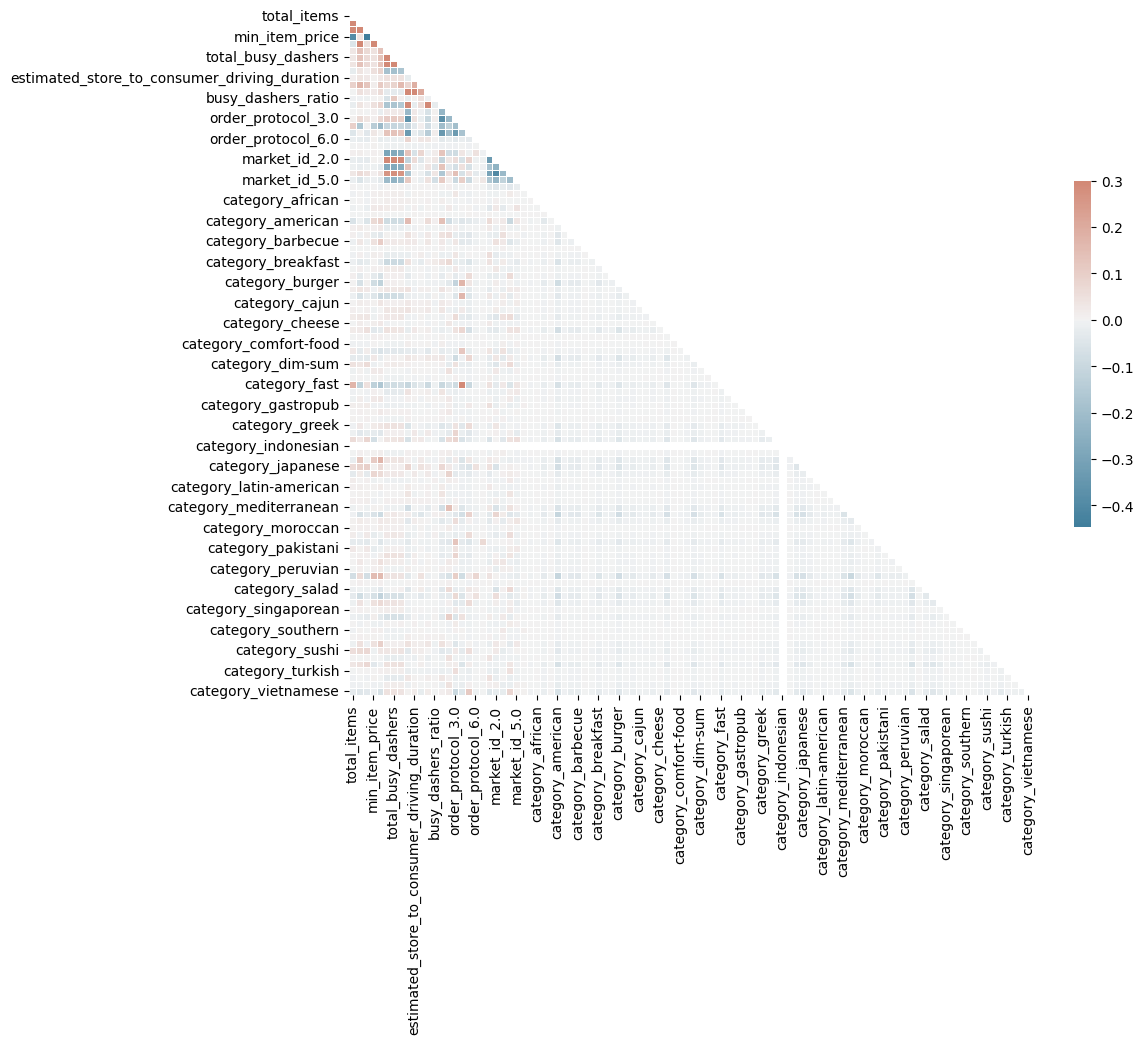

In [26]:
# create a mask
corr = train_df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [27]:
train_df['category_indonesian'].describe()

count    177070.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: category_indonesian, dtype: float64

### Identifying the Most Highly Correlated Features

1. **Getting Redundant Pairs**:
   - **`get_redundant_pairs(df)`**:
     - This function identifies the redundant pairs of columns in the correlation matrix, which include both the diagonal elements and the lower triangular part of the matrix.
     - It iterates over all pairs of columns `(i, j)` where `i` is greater than or equal to `j` and adds them to a set. This set will later be used to eliminate duplicate correlations.
   
2. **Getting the Top Absolute Correlations**:
   - **`get_top_abs_correlations(df, n=5)`**:
     - This function returns the `n` highest absolute correlations in the dataset.
     - **`df.corr()`** calculates the correlation matrix for all pairs of features.
     - **`.abs()`** converts all correlation values to their absolute values, making it easier to identify both positive and negative strong correlations.
     - **`.unstack()`** converts the correlation matrix into a long-form Series with all unique pairs of columns as index labels.
     - **`labels_to_drop = get_redundant_pairs(df)`**: The redundant pairs (including diagonal elements) are removed from the correlation results.
     - The remaining pairs are sorted in descending order based on the absolute correlation values, and the top `n` pairs are returned.
   
3. **Printing the Top 20 Absolute Correlations**:
   - **`print(get_top_abs_correlations(train_df, 20))`**:
     - This command prints out the top 20 feature pairs with the highest absolute correlation values.
     - This is useful for identifying which features are highly correlated, which can help in making decisions about feature selection or transformation.

**Interpretation**:
- By finding the most strongly correlated feature pairs, you can determine if there are any features that are redundant and may be removed or combined to simplify the model.
- High correlations may also indicate multicollinearity, which can be problematic for linear models. Identifying these pairs helps to address potential issues before training the model.
- The output will show the top 20 pairs with the strongest correlations, providing insight into how features interact with each other.


In [28]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    '''Set correlations in the desscending order and return n highest results'''
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(train_df, 20))

Top Absolute Correlations
total_onshift_dashers                         total_busy_dashers             0.941741
                                              total_outstanding_orders       0.934639
total_busy_dashers                            total_outstanding_orders       0.931295
estimated_store_to_consumer_driving_duration  estimated_non_prep_duration    0.923086
estimated_order_place_duration                order_protocol_1.0             0.897645
total_items                                   num_distinct_items             0.758146
subtotal                                      num_distinct_items             0.682890
total_items                                   subtotal                       0.557175
min_item_price                                max_item_price                 0.541241
subtotal                                      max_item_price                 0.507947
order_protocol_4.0                            category_fast                  0.489946
num_distinct_items          

### Data Preprocessing and Cleaning

1. **Dropping Unnecessary Columns**:
   - **`train_df = df.drop(columns=['created_at', 'market_id', 'store_id', 'store_primary_category', 'actual_delivery_time', 'free_store_primary_category', 'order_protocol'])`**:
     - This step removes several columns that are not needed for model training. These columns include:
       - **`created_at`** and **`actual_delivery_time`**: Date-time related information that is not directly useful for training.
       - **`market_id`**, **`store_id`**, **`store_primary_category`**, and **`order_protocol`**: Categorical variables that were previously encoded as dummies or derived from other columns.
   
2. **Concatenating One-Hot Encoded Features**:
   - **`train_df = pd.concat([train_df, order_protocol_dummies, store_primary_category_dummies], axis=1)`**:
     - This step adds the one-hot encoded variables (such as `order_protocol_dummies` and `store_primary_category_dummies`) back to the `train_df` DataFrame.
     - This ensures that categorical features are represented as numerical data, which can be used in machine learning models.

3. **Dropping More Unnecessary Columns**:
   - **`train_df = train_df.drop(columns=['total_onshift_dashers', 'total_busy_dashers', 'category_indonesian', 'estimated_non_prep_duration'])`**:
     - Here, additional columns are removed. This includes:
       - **`total_onshift_dashers`** and **`total_busy_dashers`**: These columns may be correlated with others or considered redundant.
       - **`category_indonesian`**: A specific category in the one-hot encoding that may not be useful for the analysis.
       - **`estimated_non_prep_duration`**: A derived feature that might not be relevant for prediction.

4. **Adjusting Data Type**:
   - **`train_df = train_df.astype("float32")`**:
     - This command changes the data type of the DataFrame to `float32` to save memory and speed up computations, especially when working with large datasets.

5. **Handling Infinite Values**:
   - **`train_df.replace([np.inf, -np.inf], np.nan, inplace=True)`**:
     - This step replaces any infinite values (positive or negative) in the DataFrame with `NaN`. Infinite values can arise from calculations like division by zero and need to be handled properly.
   
6. **Dropping Rows with NaN Values**:
   - **`train_df.dropna(inplace=True)`**:
     - This command removes any rows that contain `NaN` values, ensuring that only complete rows are kept in the dataset.

7. **Viewing the Cleaned Data**:
   - **`train_df.head()`**:
     - Finally, the cleaned DataFrame is displayed, allowing you to verify that the preprocessing steps have been applied correctly.

**Interpretation**:
- The dataset has been cleaned by removing irrelevant features and handling missing or infinite values.
- The DataFrame is now ready for further analysis or model training.
- After this preprocessing, the dataset will contain only the relevant numerical and one-hot encoded features, making it suitable for machine learning algorithms.


In [29]:
# drop created_at, market_id, store_id, store_primary_category, actual_delivery_time, ordfer_protocol
train_df = df.drop(columns=['created_at', 'market_id', 'store_id', 'store_primary_category', 'actual_delivery_time',
                          'free_store_primary_category', 'order_protocol'])

train_df = pd.concat([train_df, order_protocol_dummies, store_primary_category_dummies], axis=1)

train_df = train_df.drop(columns=['total_onshift_dashers', 'total_busy_dashers', 'category_indonesian',
                          'estimated_non_prep_duration'])

train_df = train_df.astype("float32")
# replace inf values with nan to drtop all nans
train_df.replace([np.inf, -np.inf], np.nan, inplace=True)
train_df.dropna(inplace=True)
train_df.head()

,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,delivery_duration,busy_dashers_ratio,...,category_southern,category_spanish,category_steak,category_sushi,category_tapas,category_thai,category_turkish,category_vegan,category_vegetarian,category_vietnamese
0,4.0,3441.0,4.0,557.0,1239.0,21.0,446.0,861.0,3779.0,0.424242,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1900.0,1.0,1400.0,1400.0,2.0,446.0,690.0,4024.0,2.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1900.0,1.0,1900.0,1900.0,0.0,446.0,690.0,1781.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6.0,6900.0,5.0,600.0,1800.0,2.0,446.0,289.0,3075.0,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.0,3900.0,3.0,1100.0,1600.0,9.0,446.0,650.0,2390.0,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Top Absolute Correlations

1. **Purpose**:
   - The goal of this command is to find the top 20 feature pairs with the highest absolute correlation values in the cleaned and preprocessed `train_df` dataset. These are the feature pairs that are strongly correlated, either positively or negatively, which can help in identifying potential issues like multicollinearity or redundant features.

2. **Method**:
   - **`get_top_abs_correlations(train_df, 20)`**:
     - This function calculates the absolute correlation between all pairs of features in the dataset, then filters out redundant pairs (including the diagonal) using the `get_redundant_pairs` function.
     - The remaining correlations are sorted in descending order, and the top 20 pairs are returned.
   
3. **What You Can Expect**:
   - The output will display the top 20 pairs of features in the `train_df` that have the highest correlation values.
   - These correlations can help identify which features are closely related to each other, which might suggest that one of them can be removed to avoid redundancy in the model.
   - Features with very high correlation (above a certain threshold) might be removed or combined to improve model performance and reduce multicollinearity.

4. **Example Output**:
   - You will see the list of feature pairs along with their correlation coefficients, sorted from the highest to the lowest absolute values.

By examining these correlations, you can make informed decisions about feature selection or transformation for your predictive modeling process.


In [30]:
print("Top Absolute Correlations")
print(get_top_abs_correlations(train_df, 20))

Top Absolute Correlations
estimated_order_place_duration  order_protocol_1.0    0.897645
total_items                     num_distinct_items    0.758146
subtotal                        num_distinct_items    0.682890
total_items                     subtotal              0.557175
min_item_price                  max_item_price        0.541241
subtotal                        max_item_price        0.507947
order_protocol_4.0              category_fast         0.489946
num_distinct_items              min_item_price        0.446733
total_items                     min_item_price        0.389277
order_protocol_1.0              order_protocol_3.0    0.373581
estimated_order_place_duration  order_protocol_3.0    0.364170
order_protocol_1.0              order_protocol_5.0    0.342345
estimated_order_place_duration  order_protocol_5.0    0.333291
order_protocol_3.0              order_protocol_5.0    0.332533
order_protocol_1.0              order_protocol_2.0    0.226903
estimated_order_place_duratio

### Creating New Features

1. **Feature Creation**:
   - **`train_df['percent_distinct_item_of_total'] = train_df["num_distinct_items"] / train_df["total_items"]`**:
     - This new feature calculates the percentage of distinct items in an order relative to the total number of items. This might provide insights into the diversity of items within an order and could influence delivery time based on item variety.
   
   - **`train_df["avg_price_per_item"] = train_df["subtotal"] / train_df["total_items"]`**:
     - This feature calculates the average price per item in the order. This might help understand how the value of items affects delivery time, as higher-value orders may take longer to process or deliver.
   
   - **`train_df.drop(columns=["num_distinct_items", "subtotal"], inplace=True)`**:
     - After creating the new features, the original columns **`num_distinct_items`** and **`subtotal`** are no longer needed, so they are dropped from the dataset.

2. **Top Absolute Correlations**:
   - **`print(get_top_abs_correlations(train_df, 20))`**:
     - This function will print out the top 20 pairs of features with the highest absolute correlations after adding the new features.
     - It allows you to evaluate how the newly created features (like `percent_distinct_item_of_total` and `avg_price_per_item`) correlate with the other features in the dataset.
   
3. **What to Expect**:
   - The output will show the strongest correlations in the updated dataset, helping you identify whether the newly created features are highly correlated with others or whether they are providing unique information.
   - You can then use this correlation information to make decisions about potential feature redundancy or multicollinearity.

By adding new features based on existing data, you're enhancing the dataset with potentially valuable information that could improve model performance. Analyzing the correlation results after feature creation can help ensure that the features added are both meaningful and not overly redundant.


In [31]:
# creating new features
train_df['percent_distinct_item_of_total'] = train_df["num_distinct_items"] / train_df["total_items"]
train_df["avg_price_per_item"] = train_df["subtotal"] / train_df["total_items"]
train_df.drop(columns=["num_distinct_items", "subtotal"], inplace=True)
print("Top Absolute Correlations")
print(get_top_abs_correlations(train_df, 20))

Top Absolute Correlations
estimated_order_place_duration  order_protocol_1.0                0.897645
min_item_price                  avg_price_per_item                0.860580
max_item_price                  avg_price_per_item                0.770382
min_item_price                  max_item_price                    0.541241
order_protocol_4.0              category_fast                     0.489946
total_items                     percent_distinct_item_of_total    0.445751
                                min_item_price                    0.389277
order_protocol_1.0              order_protocol_3.0                0.373581
estimated_order_place_duration  order_protocol_3.0                0.364170
order_protocol_1.0              order_protocol_5.0                0.342345
estimated_order_place_duration  order_protocol_5.0                0.333291
order_protocol_3.0              order_protocol_5.0                0.332533
total_items                     avg_price_per_item                0.310759

### Creating New Feature: Price Range of Items

1. **Feature Creation**:
   - **`train_df["price_range_of_items"] = train_df["max_item_price"] - train_df["min_item_price"]`**:
     - This new feature calculates the difference between the maximum and minimum item prices in an order. It represents the price range of items in the order, which could be a valuable indicator of the complexity or diversity of the items, potentially affecting the delivery time.
   
   - **`train_df.drop(columns=["max_item_price", "min_item_price"], inplace=True)`**:
     - After creating the `price_range_of_items` feature, the original features **`max_item_price`** and **`min_item_price`** are dropped, as their information is now encapsulated in the new feature.

2. **Top Absolute Correlations**:
   - **`print(get_top_abs_correlations(train_df, 20))`**:
     - This function will print the top 20 pairs of features with the highest absolute correlations, which helps you assess whether the new feature **`price_range_of_items`** is strongly correlated with any other features in the dataset.
     - The output will show how strongly **`price_range_of_items`** correlates with other variables, giving you insights into its potential influence on the target variable or multicollinearity with other features.

3. **What to Expect**:
   - After creating the **`price_range_of_items`** feature, you will see the updated correlation matrix.
   - The output will include correlations involving the new feature, allowing you to evaluate its relevance and relationships with other variables in the dataset.

### Summary:
- The addition of **`price_range_of_items`** can provide additional insight into the characteristics of an order, especially regarding its price variability.
- By reviewing the correlation results, you can assess how the new feature interacts with others and decide if further transformations or feature eliminations are necessary for effective model training.


In [32]:
train_df["price_range_of_items"] = train_df["max_item_price"] - train_df["min_item_price"]
train_df.drop(columns=["max_item_price", "min_item_price"], inplace=True)
print("Top Absolute Correlations")
print(get_top_abs_correlations(train_df, 20))

Top Absolute Correlations
estimated_order_place_duration                order_protocol_1.0                0.897645
order_protocol_4.0                            category_fast                     0.489946
total_items                                   percent_distinct_item_of_total    0.445751
order_protocol_1.0                            order_protocol_3.0                0.373581
estimated_order_place_duration                order_protocol_3.0                0.364170
order_protocol_1.0                            order_protocol_5.0                0.342345
total_items                                   price_range_of_items              0.333304
estimated_order_place_duration                order_protocol_5.0                0.333291
order_protocol_3.0                            order_protocol_5.0                0.332533
total_items                                   avg_price_per_item                0.310759
order_protocol_1.0                            order_protocol_2.0                0.22

## Multicollinearity Check


### Variance Inflation Factor (VIF) and Its Importance

1. **Importing VIF**:
   - The line `from statsmodels.stats.outliers_influence import variance_inflation_factor` imports the **Variance Inflation Factor (VIF)** function from the `statsmodels` library.
   - **VIF** is a measure used to assess the degree of multicollinearity in a set of features. It quantifies how much a variable is inflating the standard errors due to collinearity with other variables.
   - If VIF is high for a feature, it indicates that this feature is highly correlated with other features in the dataset, which can make the model unstable and cause unreliable predictions.

2. **Why is VIF Important?**
   - **Multicollinearity**: High VIF values signal that certain predictors are highly correlated with each other, which can lead to issues like:
     - Increased variance in model coefficients.
     - Reduced interpretability of individual feature effects.
   - **Threshold for VIF**: Generally, a VIF greater than 10 indicates problematic multicollinearity, and such features may need to be removed or transformed to improve model performance.

3. **How to Use VIF**:
   - Once the VIF function is imported, you can compute the VIF for each feature in your dataset. Features with high VIF values (typically greater than 10) can be considered for removal or transformation.
   - **Use Case**: After creating or transforming features in your dataset, it's crucial to calculate the VIF for each feature and remove features with high VIF to ensure that your model isn't suffering from multicollinearity.

### Next Steps:
- Now that you have access to the VIF function, you can apply it to your dataset to identify any problematic features that need to be removed or combined for better model performance.


In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

### Function to Compute Variance Inflation Factor (VIF)

1. **Function Definition**:
   - **`def compute_vif(features):`**: This defines a function called `compute_vif`, which takes a list of features as input.
   - **`vif_data = pd.DataFrame()`**: Initializes an empty DataFrame to store the features and their corresponding VIF values.
   - **`vif_data["features"] = features`**: Adds the list of features to the DataFrame as a column called **"features"**.
   - **`vif_data["VIF"] = [variance_inflation_factor(train_df[features].values, i) for i in range(len(features))]`**:
     - For each feature in the list, the **`variance_inflation_factor()`** function from the `statsmodels` library is used to calculate the VIF.
     - The `variance_inflation_factor()` function calculates how much the variance of a regression coefficient is inflated due to multicollinearity.
     - **`train_df[features].values`** is the input matrix of feature values, and the function iterates over each feature to compute its VIF.
   - **`return vif_data.sort_values(by=["VIF"]).reset_index(drop=True)`**:
     - After calculating the VIF values, the function sorts the features in ascending order of VIF.
     - The index is reset for a clean, sequential index, and the DataFrame is returned.

2. **What Does This Do?**
   - The `compute_vif()` function will output a sorted DataFrame showing the features and their respective VIF values. This helps in identifying highly collinear features in your dataset.
   - Features with high VIF values (typically above 10) indicate that they are highly correlated with other variables and may need to be addressed (e.g., dropped, transformed, or combined).

3. **How to Use This Function**:
   - Once you have created or transformed your features, you can pass the feature names into this function to compute the VIF for each feature.
   - This will give you a clear idea of which features might be causing multicollinearity in your model and help you improve model stability and performance.

### Example Usage:

```python
# Assuming 'train_df' is your dataset and you've already selected relevant features
features = train_df.columns.tolist()  # List all features from your dataset
vif_results = compute_vif(features)
print(vif_results)


In [34]:
def compute_vif(features):
    '''Compute the VIF score using the variance_inflation_factor() function'''
    vif_data = pd.DataFrame()
    vif_data["features"] = features
    vif_data["VIF"] = [variance_inflation_factor(train_df[features].values, i) for i in range(len(features))]
    return vif_data.sort_values(by=["VIF"]).reset_index(drop=True)

### Applying VIF Computation to All Columns (Except the Target Variable)

1. **Removing the Target Variable**:
   - **`features = train_df.drop(columns=['delivery_duration']).columns.to_list()`**:
     - This line prepares a list of all feature column names in the dataset, except for the **`'delivery_duration'`** target variable.
     - Since **`delivery_duration`** is the target variable, it's excluded from the feature list for the VIF computation. The target variable should not be included in multicollinearity analysis because we are only interested in checking collinearity between the independent features.

2. **Computing VIF**:
   - **`vif_data = compute_vif(features)`**:
     - The `compute_vif()` function is applied to the list of features (excluding the target variable). This will return a DataFrame that shows the VIF scores for each feature.

3. **Output of VIF Computation**:
   - **`vif_data`**:
     - This will display the features along with their calculated VIF values. Features with higher VIF scores (typically greater than 10) suggest that those features are highly correlated with other features in the dataset, indicating multicollinearity.

4. **Next Steps**:
   - Based on the VIF values, you can decide which features to drop or combine. Features with high VIF may need to be addressed, either by removing them or transforming them to reduce multicollinearity.

### Example Output:

```python
print(vif_data)


In [35]:
# apply VIF computation to all columns
features = train_df.drop(columns=['delivery_duration']).columns.to_list()
vif_data = compute_vif(features)
vif_data

,features,VIF
0,category_alcohol-plus-food,1.000864
1,category_chocolate,1.000903
2,category_belgian,1.001622
3,category_russian,1.007996
4,category_african,1.008277
...,...,...
83,order_protocol_5.0,29.586811
84,percent_distinct_item_of_total,32.148259
85,order_protocol_3.0,33.681741
86,order_protocol_1.0,45.019889


### Handling Multicollinearity by Removing High VIF Features

1. **Purpose**:
   - The goal of this code is to handle multicollinearity by iteratively removing the features with the highest Variance Inflation Factor (VIF) until all remaining features have VIF values below a threshold of 20. This is typically done to ensure that no single feature is highly correlated with others, which can distort the results of regression models.

2. **Process**:

   - **`multicollinearity = True`**:
     - A flag variable is set to `True` to begin the process of eliminating features with high VIF.

   - **`while multicollinearity:`**:
     - A `while` loop is initiated. The loop will continue as long as any feature has a VIF greater than 20 (indicating multicollinearity).

   - **`highest_vif_feature = vif_data['features'].values.tolist()[-1]`**:
     - Inside the loop, the feature with the highest VIF score is identified. This is done by extracting the last feature in the sorted `vif_data` DataFrame, which corresponds to the highest VIF score.

   - **`print("Remove", highest_vif_feature)`**:
     - The name of the feature with the highest VIF score is printed, indicating that it will be removed.

   - **`features.remove(highest_vif_feature)`**:
     - The feature with the highest VIF score is removed from the list of features. This ensures that the next VIF calculation does not include this feature.

   - **`vif_data = compute_vif(features)`**:
     - After removing the feature, the VIF scores for the remaining features are recalculated using the `compute_vif()` function.

   - **`multicollinearity = False if len(vif_data[vif_data['VIF'] > 20]) == 0 else True`**:
     - The `multicollinearity` flag is updated. If there are no remaining features with a VIF greater than 20, the loop terminates by setting `multicollinearity` to `False`. Otherwise, it continues.

3. **Output**:
   - **`selected_features = vif_data['features'].values.tolist()`**:
     - After the loop finishes, the final list of selected features (those with VIF values below 20) is stored in the `selected_features` list.
   
   - **`vif_data`**:
     - The final VIF data is printed, showing the features that remain after the multicollinearity reduction process, with all VIF values below 20.

### Example Output:

```python
print(vif_data)


In [36]:
# drop the highest VIF score until all VIF scores are below 20
multicollinearity = True

while multicollinearity:
    highest_vif_feature = vif_data['features'].values.tolist()[-1]
    print("Remove", highest_vif_feature)
    features.remove(highest_vif_feature)
    vif_data = compute_vif(features)
    multicollinearity = False if len(vif_data[vif_data['VIF'] > 20]) == 0 else True

selected_features = vif_data['features'].values.tolist()
vif_data

Remove estimated_order_place_duration
Remove order_protocol_1.0
Remove percent_distinct_item_of_total


,features,VIF
0,category_belgian,1.000192
1,category_alcohol-plus-food,1.000226
2,category_chocolate,1.000243
3,category_gluten-free,1.001221
4,category_russian,1.001502
...,...,...
80,category_american,3.148787
81,category_pizza,3.271753
82,avg_price_per_item,5.967502
83,busy_dashers_ratio,6.363308


### Preparing Data for Random Forest Model

1. **Selecting Features and Target Variable**:
   - **`X = train_df[selected_features]`**:
     - Here, the selected features from the previous VIF reduction process are used as the independent variables (`X`) for training the model. These features have been filtered to ensure that multicollinearity is minimized.

   - **`y = train_df['delivery_duration']`**:
     - The target variable (`y`) is the **`'delivery_duration'`** column, which represents the time it takes for the delivery. This is what the model will be trained to predict.

2. **Splitting Data into Training and Testing Sets**:
   - **`X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)`**:
     - The `train_test_split` function is used to split the data into training and testing sets.
     - **80%** of the data will be used for training (`X_train`, `y_train`), and **20%** will be reserved for testing the model (`X_test`, `y_test`).
     - The `random_state=42` ensures reproducibility of the split (so the results are consistent across runs).

3. **Next Steps**:
   - After this, the dataset is ready for training a **Random Forest Regressor** model, which will be trained on the training set (`X_train`, `y_train`).
   - The model will then be evaluated on the testing set (`X_test`, `y_test`) to predict the **`'delivery_duration'`** and assess performance.

### Next Steps:
- Now that we have our data split into training and test sets, we can move on to training a model (e.g., Random Forest) and evaluating its performance.


In [37]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# selected features are selected in multicollinearity part
X = train_df[selected_features]
y = train_df['delivery_duration']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Random Forest Feature Importance

1. **Model Training**:
   - **`forest = RandomForestRegressor(n_estimators=100, random_state=42)`**:
     - A **Random Forest Regressor** model is initialized with 100 estimators (decision trees) and a fixed random seed (`random_state=42`) to ensure reproducibility.

   - **`forest.fit(X_train, y_train)`**:
     - The model is trained using the training data (`X_train` for features and `y_train` for the target variable, `'delivery_duration'`).
   
2. **Extracting Feature Importances**:
   - **`feats = {}`**:
     - An empty dictionary `feats` is created to store the feature names and their corresponding importance values.

   - **`for feature, importance in zip(X.columns, forest.feature_importances_):`**:
     - The feature importance values for each feature are extracted from the model's `feature_importances_` attribute.
     - These importance values represent the contribution of each feature to the model's prediction.

   - **`feats[feature] = importance`**:
     - For each feature, the corresponding importance is stored in the dictionary `feats` with the feature name as the key and the importance value as the value.

3. **Visualizing Feature Importance**:
   - **`importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})`**:
     - The dictionary `feats` is converted into a pandas DataFrame, with the feature names as the index and the importance values as the column.
     - The column is renamed to `Gini-importance` to indicate that the importance is computed using the Gini index.

   - **`importances.sort_values(by='Gini-importance').plot(kind='bar', rot=90, figsize=(15, 12))`**:
     - The `importances` DataFrame is sorted by the Gini importance values in ascending order and plotted as a bar chart.
     - The x-axis represents the feature names, and the y-axis represents the importance of each feature in predicting the target variable (`'delivery_duration'`).

   - **`plt.show()`**:
     - The plot is displayed, providing a visual understanding of the feature importances.

### What This Plot Shows:
- The bar plot allows you to visualize which features contribute the most to the prediction of delivery duration. Features with higher Gini importance values are more influential in predicting the target variable.
- You can use this information to decide which features are key drivers and potentially remove less important ones to optimize model performance.

### Next Steps:
- After evaluating feature importance, you can refine your model by either focusing on the most important features or adjusting the model's hyperparameters for better performance.


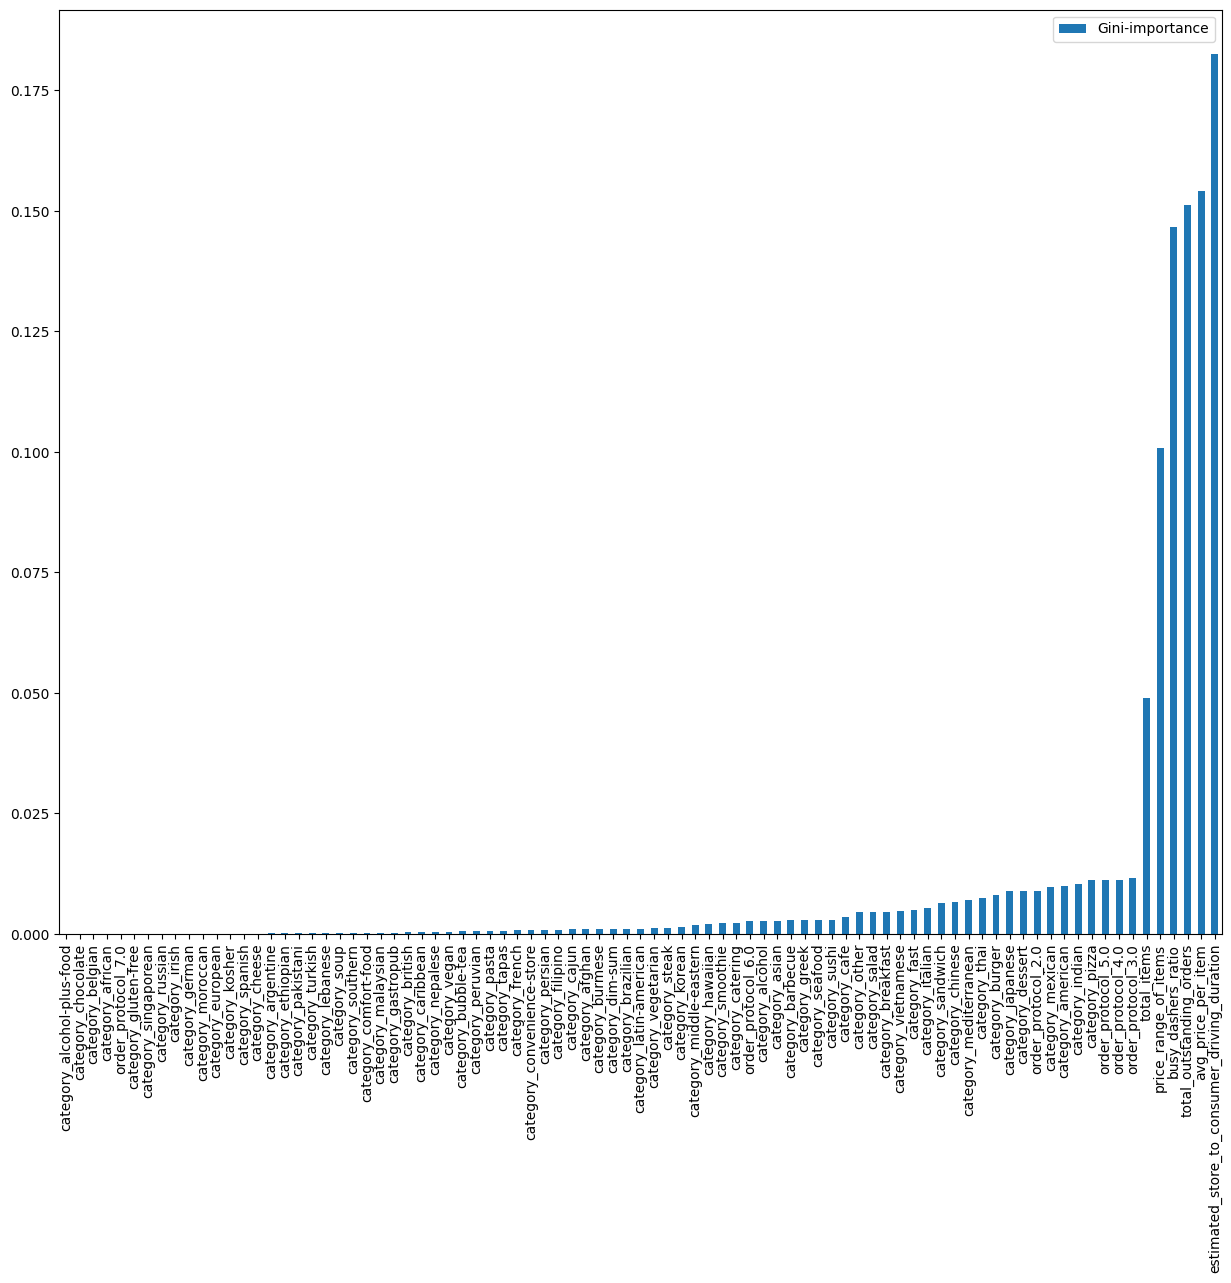

In [38]:
feature_names = [f"feature {i}" for i in range(X_train.shape[1])]
forest = RandomForestRegressor(n_estimators=100, random_state=42)
forest.fit(X_train, y_train)
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(X.columns, forest.feature_importances_):
    feats[feature] = importance #add the name/value pair

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance').plot(kind='bar', rot=90, figsize=(15, 12))
plt.show();

### Plotting the Least Important Features

1. **Selecting the Least Important Features**:
   - **`importances.sort_values(by='Gini-importance')[-35:]`**:
     - The `importances` DataFrame, which contains the Gini importance of each feature, is sorted by the `Gini-importance` column in ascending order.
     - The `[-35:]` slice selects the **35 least important features** based on their Gini importance score. These features are the ones with the smallest contributions to the model's predictions.

2. **Plotting the Features**:
   - **`plot(kind='bar', rot=90, figsize=(15, 12))`**:
     - The least important features are plotted as a **bar chart**.
     - The x-axis represents the feature names, and the y-axis represents their Gini importance values.
     - **`rot=90`** rotates the feature names by 90 degrees for better readability when the names are long.
     - **`figsize=(15, 12)`** adjusts the figure size to ensure the plot is large enough to clearly show all the features.

3. **Displaying the Plot**:
   - **`plt.show()`**:
     - This command displays the plot, providing a clear visualization of the least important features according to their Gini importance.

### Purpose of This Plot:
- This visualization allows you to identify which features have little impact on the model's predictions. 
- You could consider removing or further analyzing these features to improve model efficiency and reduce complexity.

### Next Steps:
- Based on this analysis, you might choose to drop some of these less important features, retrain the model, and check if the model performance improves.


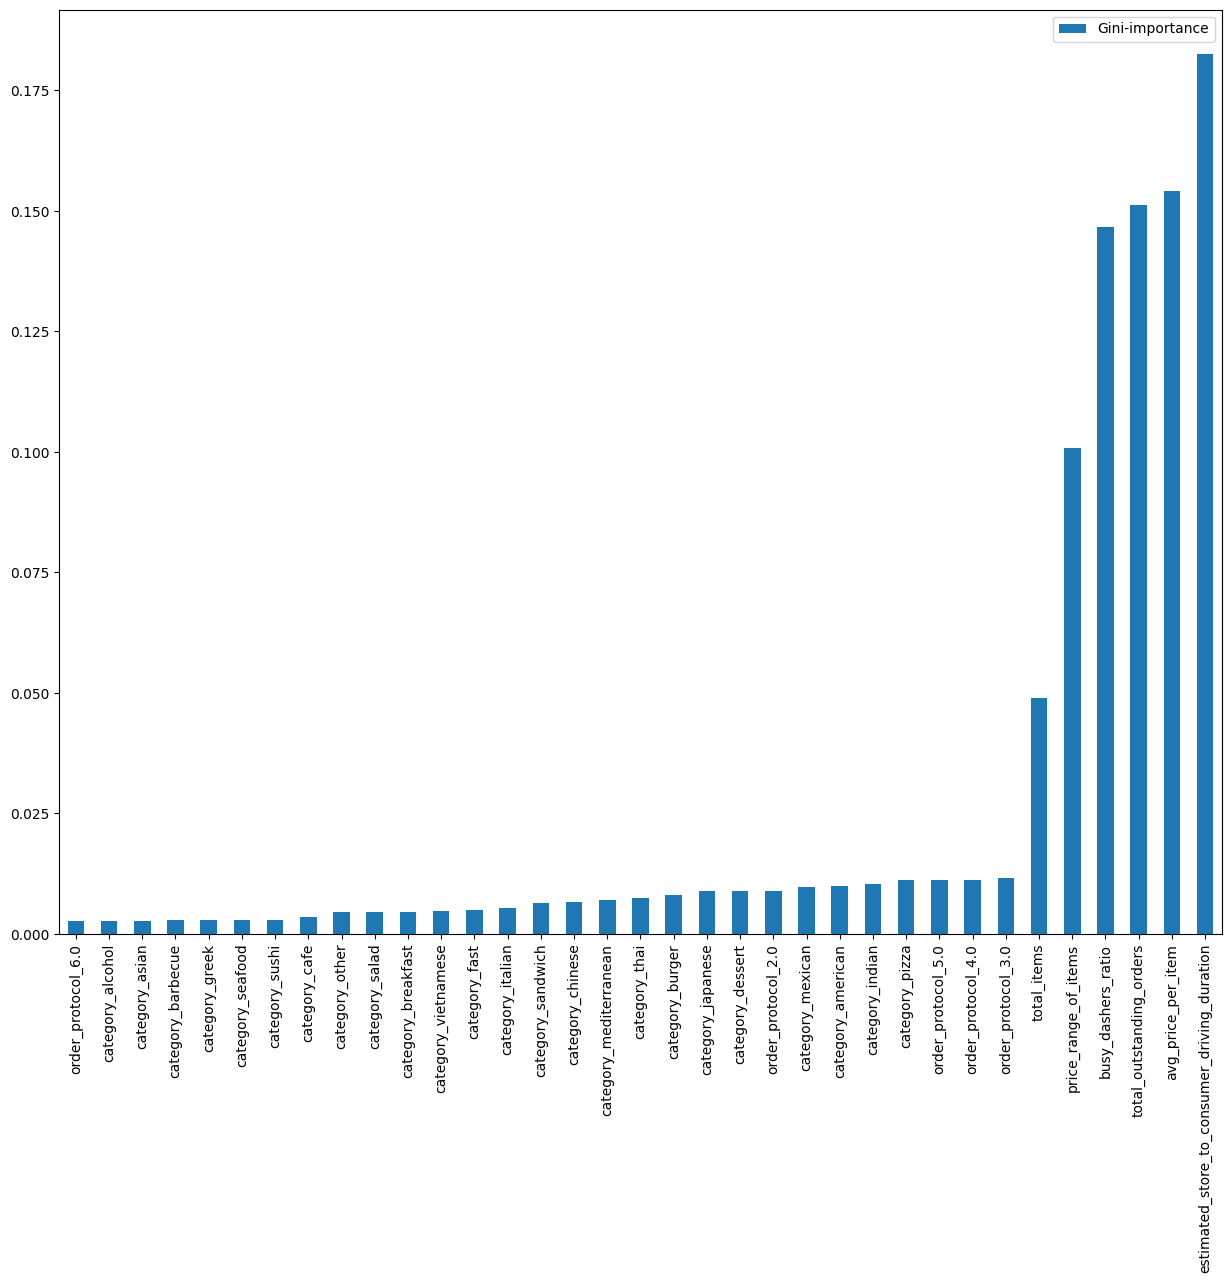

In [39]:
importances.sort_values(by='Gini-importance')[-35:].plot(kind='bar', rot=90, figsize=(15, 12))
plt.show();

### Extracting the Column Names of the Least Important Features

1. **`importances.sort_values(by='Gini-importance')[-35:]`**:
   - This part of the code sorts the features by their Gini importance in ascending order and selects the **35 least important features**.

2. **`.index.tolist()`**:
   - After sorting and selecting the least important features, the `.index` attribute is used to retrieve the feature names (which are the row indices of the sorted DataFrame).
   - **`.tolist()`** converts the index into a list of feature names.

### Output:
- This code will return a list of the **35 least important feature names** based on their Gini importance. 
- These feature names can then be reviewed or potentially removed in the next steps of model refinement.

### Next Steps:
- Use this list of least important features to assess whether they should be dropped from the dataset, thereby simplifying the model and possibly improving its performance by reducing overfitting.


In [40]:
# we can obtain the column names as next
importances.sort_values(by='Gini-importance')[-35:].index.tolist()

['order_protocol_6.0',
 'category_alcohol',
 'category_asian',
 'category_barbecue',
 'category_greek',
 'category_seafood',
 'category_sushi',
 'category_cafe',
 'category_other',
 'category_salad',
 'category_breakfast',
 'category_vietnamese',
 'category_fast',
 'category_italian',
 'category_sandwich',
 'category_chinese',
 'category_mediterranean',
 'category_thai',
 'category_burger',
 'category_japanese',
 'category_dessert',
 'order_protocol_2.0',
 'category_mexican',
 'category_american',
 'category_indian',
 'category_pizza',
 'order_protocol_5.0',
 'order_protocol_4.0',
 'order_protocol_3.0',
 'total_items',
 'price_range_of_items',
 'busy_dashers_ratio',
 'total_outstanding_orders',
 'avg_price_per_item',
 'estimated_store_to_consumer_driving_duration']

### Principal Component Analysis (PCA) and Explained Variance

1. **Standardizing the Data**:
   - **`X_Train = X_train.values`**: 
     - The feature matrix `X_train` is converted into a NumPy array using `.values`. This is necessary for feeding the data into PCA.
   - **`X_std = StandardScaler().fit_transform(X_Train)`**:
     - The data is standardized using `StandardScaler`, which centers the data to have a mean of 0 and scales it to have a unit variance. This step ensures that all features contribute equally to the PCA.

2. **Applying PCA**:
   - **`pca = PCA().fit(X_std)`**: 
     - PCA is applied to the standardized data (`X_std`). The `fit()` method computes the principal components from the data, capturing the variance of the dataset.

3. **Plotting Cumulative Explained Variance**:
   - **`plt.plot(np.cumsum(pca.explained_variance_ratio_))`**: 
     - The `explained_variance_ratio_` provides the proportion of the total variance explained by each principal component.
     - **`np.cumsum()`** calculates the cumulative sum of these explained variances, showing how much variance is explained by the first few components.
   - **`plt.xlim(0, 81, 1)`**:
     - This command sets the x-axis limits to span from 0 to 81 (number of features) with a step size of 1. This is useful for visualizing the cumulative variance across all the components.
   - **`plt.xlabel('Number of components')`** and **`plt.ylabel('Cumulative explained variance')`**:
     - Labels for the axes to indicate that the x-axis shows the number of components, and the y-axis shows the cumulative explained variance.

4. **Displaying the Plot**:
   - **`plt.show()`**:
     - The plot is displayed, showing how the explained variance increases as more principal components are included.

### Purpose of this Plot:
- This plot helps to visualize how many principal components are needed to explain most of the variance in the dataset. 
- The goal is to choose a number of components that explain a significant portion of the variance (e.g., 90% or 95%), while reducing the dimensionality of the data.

### Next Steps:
- Based on the cumulative explained variance plot, you can choose an optimal number of components to retain, simplifying the dataset while maintaining most of the information.


/tmp/ipykernel_30/905817532.py:11: MatplotlibDeprecationWarning: Passing the emit parameter of set_xlim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.xlim(0,81,1)


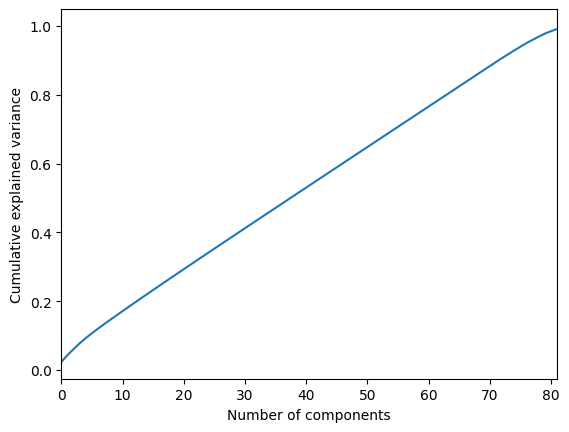

In [41]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X_Train=X_train.values
X_Train=np.asarray(X_Train)

# Finding normalised array of X_Train
X_std=StandardScaler().fit_transform(X_Train)
pca = PCA().fit(X_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,81,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show();

### Scaling Function Explanation

The provided function `scale` is designed to apply the chosen scaling technique to both the **feature variables** (`X`) and the **target variable** (`y`). This is done using a scaler that normalizes or standardizes the data. Here's a breakdown of the steps:

1. **Input Parameters**:
   - **`scaler`**: The scaler object (e.g., `MinMaxScaler`, `StandardScaler`) that will be applied to the data.
   - **`X`**: The feature matrix containing the independent variables.
   - **`y`**: The target variable (dependent variable), which is being predicted.

2. **Applying the Scaler to Features (`X`)**:
   - **`X_scaler.fit(X=X, y=y)`**: 
     - The `fit()` method learns the scaling parameters from the feature matrix (`X`) and the target variable (`y`). In this case, `y` is passed to `fit()` to ensure the scaler considers the relationship between the features and the target during scaling (this is generally useful for certain scalers).
   - **`X_scaled = X_scaler.transform(X)`**: 
     - After fitting, the `transform()` method applies the learned scaling parameters to the features (`X`), scaling them accordingly.

3. **Applying the Scaler to the Target (`y`)**:
   - **`y_scaler.fit(y.values.reshape(-1, 1))`**: 
     - `y` is reshaped to a 2D array (`-1, 1` ensures it has one column) because scikit-learn expects the target variable to be in this format for scaling.
   - **`y_scaled = y_scaler.transform(y.values.reshape(-1, 1))`**: 
     - The target variable is transformed (scaled) using the same scaler.

4. **Return Values**:
   - **`X_scaled`**: Scaled feature matrix.
   - **`y_scaled`**: Scaled target variable.
   - **`X_scaler`**: The scaler object used to scale the features, which can be useful for transforming new data.
   - **`y_scaler`**: The scaler object used to scale the target variable.

### Purpose:
- This function standardizes or normalizes both the features and target variable. It is particularly helpful when you want to ensure that both features and target are scaled similarly (e.g., for models sensitive to scaling like gradient boosting or neural networks).
  
### Next Steps:
- This function can be used to scale the data before feeding it into machine learning models, ensuring that features and target variables have consistent scales.


In [42]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

def scale(scaler, X, y):
    """Apply the selected scaler to features and target variables"""
    X_scaler = scaler
    X_scaler.fit(X=X, y=y)
    X_scaled = X_scaler.transform(X)
    y_scaler = scaler
    y_scaler.fit(y.values.reshape(-1, 1))
    y_scaled = y_scaler.transform(y.values.reshape(-1, 1))
    
    return X_scaled, y_scaled, X_scaler, y_scaler

In [43]:
# example
X_scaled, y_scaled, X_scaler, y_scaler = scale(MinMaxScaler(), X, y)

In [44]:
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

### RMSE with Inverse Transform Function Explanation

The provided function `rmse_with_inv_transform` calculates the **Root Mean Squared Error (RMSE)** for a model's predictions after reversing the scaling transformation applied to the target variable (`y`). This is useful when the model has been trained on scaled data but you want to report the error in the original scale of the target variable.

Here’s a breakdown of the function:

1. **Input Parameters**:
   - **`scaler`**: The scaler object used to scale the target variable (`y`). This is necessary to reverse the scaling transformation.
   - **`y_test`**: The actual target values from the test set.
   - **`y_pred_scaled`**: The scaled predicted values (i.e., the output from the model after it has been trained on scaled data).
   - **`model_name`**: A string representing the name of the model (e.g., `'RandomForest'`, `'LinearRegression'`) that can be used for labeling the error output.

2. **Inverse Transformation**:
   - **`y_predict = scaler.inverse_transform(y_pred_scaled.reshape(-1, 1))`**:
     - The `inverse_transform()` function reverses the scaling operation on the predicted values (`y_pred_scaled`), converting them back to the original scale of the target variable (`y`).
     - The `.reshape(-1, 1)` is necessary because `inverse_transform()` expects a 2D array, where the number of rows is the number of predictions and the number of columns is 1 (for a single target variable).

3. **RMSE Calculation**:
   - **`rmse_error = mean_squared_error(y_test, y_predict[:, 0], squared=False)`**:
     - The `mean_squared_error()` function from `sklearn.metrics` computes the RMSE between the actual values (`y_test`) and the predicted values (`y_predict[:, 0]`).
     - The `squared=False` argument ensures that the result is RMSE (root of the mean squared error) instead of MSE.

4. **Output**:
   - **`print("Error = {}".format(rmse_error) + " in " + model_name)`**:
     - Prints the calculated RMSE along with the model name to identify which model's error is being reported.
   - **`return rmse_error, y_predict`**:
     - Returns the RMSE error and the predictions (`y_predict`) on the original scale (inverse-transformed values).

### Purpose:
- This function is particularly useful when you have used a scaling technique (like standardization or normalization) on the target variable during model training. After making predictions on scaled data, you need to revert the predictions back to the original scale of the target variable to calculate the RMSE in the correct units.
  
### Example Use Case:
- If you train a model on a scaled version of your target variable and wish to evaluate the model's performance using RMSE on the original target scale (e.g., minutes or hours), this function can be used to report the RMSE in those original units.

### Output:
- The function prints the RMSE of the model in the original scale and returns both the RMSE and the inverse-transformed predictions.


In [45]:
from sklearn.metrics import mean_squared_error

def rmse_with_inv_transform(scaler, y_test, y_pred_scaled, model_name):
    '''Convert the scaled error to actual error'''
    y_predict = scaler.inverse_transform(y_pred_scaled.reshape(-1, 1))
    # return RMSE with squared error
    rmse_error = mean_squared_error(y_test, y_predict[:, 0], squared=False)
    print("Error = {}".format(rmse_error)+" in " + model_name)
    return rmse_error, y_predict

### Explanation of `make_regression` Function

The function `make_regression` is designed to apply a selected regression model to the training and test data, calculate the error (RMSE), and return the trained model along with the predictions. It is useful for evaluating the performance of a regression model on both training and test datasets.

#### Function Parameters:
- **`X_train`**: The feature matrix for the training data (independent variables).
- **`y_train`**: The target variable for the training data (dependent variable).
- **`X_test`**: The feature matrix for the test data (independent variables).
- **`y_test`**: The target variable for the test data (dependent variable).
- **`model`**: The regression model to be applied (e.g., Linear Regression, Random Forest, etc.).
- **`model_name`**: A string representing the name of the model, which is used for display in error messages.
- **`verbose`**: A boolean parameter that controls whether the function prints the error values or not. By default, it is set to `True` to display the errors.

#### Function Workflow:
1. **Model Training**:
   - The model is trained using the `fit()` method on the training data (`X_train`, `y_train`).
   - **`model.fit(X_train, y_train)`** trains the model on the training dataset.

2. **Train Error Calculation**:
   - After the model is trained, predictions are made on the training data using the `predict()` method.
   - **`y_predict = model.predict(X_train)`** generates predictions on the training data.
   - The train error (RMSE) is calculated by comparing the predicted values (`y_predict`) with the actual values (`y_train`) using the **`mean_squared_error()`** function with `squared=False` to get RMSE.
   - **`train_error = mean_squared_error(y_train, y_predict, squared=False)`** calculates the RMSE on the training set.

3. **Test Error Calculation**:
   - After training the model, it is tested on the test data to check how well it generalizes to unseen data.
   - **`y_predict = model.predict(X_test)`** generates predictions on the test data.
   - The test error (RMSE) is calculated similarly by comparing the predicted values with the actual test values.
   - **`test_error = mean_squared_error(y_test, y_predict, squared=False)`** calculates the RMSE on the test set.

4. **Verbose Output**:
   - If `verbose=True`, the function prints the training and testing RMSE for the provided model, giving insights into how well the model performs on both the training and test datasets.
   - The error values are displayed with the model name: **"Train Error"** and **"Test Error"**.

5. **Return Values**:
   - The function returns the trained model, predictions on the test set (`y_predict`), and the RMSE for both the training and testing datasets.
   - **`trained_model`, `y_predict`, `train_error`, `test_error`** are returned for further analysis or reporting.

#### Example Use Case:
- This function can be used in any machine learning pipeline where regression models are applied, and it helps evaluate the model’s performance through RMSE, both on training and test datasets. It can be applied to multiple regression models such as Linear Regression, Random Forest Regression, and others.

#### Output:
- **Train Error**: The RMSE on the training dataset.
- **Test Error**: The RMSE on the test dataset.
- **Trained Model**: The trained regression model, ready for future predictions or analysis.


In [46]:
def make_regression(X_train, y_train, X_test, y_test, model, model_name, verbose=True):
    """Apply selected regression model to data and measure error"""
    model.fit(X_train, y_train)
    y_predict = model.predict(X_train)
    train_error = mean_squared_error(y_train, y_predict, squared=False)
    y_predict = model.predict(X_test)
    test_error = mean_squared_error(y_test, y_predict, squared=False)
    if verbose:
        print("Train Error = {}".format(train_error)+" in " + model_name)
        print("Test Error = {}".format(test_error)+" in " + model_name)
    trained_model = model

    return trained_model, y_predict, train_error, test_error

### Explanation of Model Evaluation Loop

This code defines a loop to evaluate different regression models using multiple feature sets and scalers, and then records the RMSE for each combination. The goal is to compare how various models perform with different preprocessing steps (such as scaling and feature selection). This approach helps identify the best model and feature set for predicting the target variable (`delivery_duration`).

#### Key Components:

1. **Regression Models**:
   - A dictionary (`regression_models`) contains a selection of regression models that are being evaluated:
     - **Ridge Regression** (`Ridge`)
     - **Decision Tree Regressor** (`DecisionTree`)
     - **Random Forest Regressor** (`RandomForestRegressor`)
     - **XGBoost Regressor** (`XGBRegressor`)
     - **LightGBM Regressor** (`LGBMRegressor`)
     - **Multi-layer Perceptron Regressor** (`MLPRegressor`)
   
2. **Feature Sets**:
   - `feature_sets` defines different sets of features to be used for training the models. These include:
     - **full_dataset**: All available features.
     - **selected_features_40**: The top 40 features based on Gini importance.
     - **selected_features_20**: The top 20 features based on Gini importance.
     - **selected_features_10**: The top 10 features based on Gini importance.

3. **Scalers**:
   - `scalers` defines the scaling methods to be applied:
     - **StandardScaler**: Standardizes the features by removing the mean and scaling to unit variance.
     - **MinMaxScaler**: Scales the features to a specified range, typically [0, 1].
     - **NotScale**: No scaling applied.

4. **Evaluation Loop**:
   - The loop iterates over each feature set, scaler, and regression model. For each combination, the following steps are taken:
   
     1. **Feature Selection**: The selected feature set is used for training and testing the model.
     2. **Scaling**: If a scaler is specified (other than `NotScale`), the features and target variable are scaled using the selected scaler.
     3. **Model Training**: The selected regression model is trained on the data using the `make_regression()` function, which evaluates the model's performance by computing the RMSE.
     4. **Inverse Transformation**: If scaling was applied, the predictions are inverse transformed back to the original scale using `rmse_with_inv_transform()`.
     5. **Record Results**: The model name, feature set, scaler name, and RMSE are recorded in the `pred_dict` dictionary for later analysis.

#### Output:
The `pred_dict` dictionary stores the following information:
- **`regression_model`**: The name of the regression model being used (e.g., Ridge, Decision Tree, etc.).
- **`feature_set`**: The feature set used for training (e.g., full dataset, top 40 features).
- **`scaler_name`**: The scaler used for preprocessing (e.g., StandardScaler, MinMaxScaler).
- **`RMSE`**: The RMSE (Root Mean Squared Error) for the model on the test set, indicating the model's prediction accuracy.

#### Example Use Case:
This code structure is useful when performing model selection and hyperparameter tuning, as it allows for a systematic evaluation of different models with varying feature sets and preprocessing steps. By comparing the RMSE for each combination, it helps identify which model and data preprocessing technique provide the best performance for the task at hand.

### How to Interpret the Results:
After running this loop, you can analyze the `pred_dict` dictionary to identify the best-performing model and feature set combination. The model with the lowest RMSE across different feature sets and scalers would be considered the most accurate model for predicting the target variable (`delivery_duration`).


In [47]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.neural_network import MLPRegressor
from sklearn import tree
from sklearn import svm
from sklearn import neighbors
from sklearn import linear_model

pred_dict = {
    "regression_model": [],
    "feature_set": [],
    "scaler_name": [],
    "RMSE": [],
}

regression_models = {
    "Ridge": linear_model.Ridge(),
    "DecisionTree": tree.DecisionTreeRegressor(max_depth=6),
    "RandomForestRegressor": RandomForestRegressor(),
    "XGBoost": XGBRegressor(),
    "LGBM": LGBMRegressor(),
    "MLP": MLPRegressor(),
}

feature_sets = {
    "full_dataset": X.columns.to_list(),
    "selected_features_40": importances.sort_values(by='Gini-importance')[-40:].index.tolist(),
    "selected_features_20": importances.sort_values(by='Gini-importance')[-20:].index.tolist(),
    "selected_features_10": importances.sort_values(by='Gini-importance')[-10:].index.tolist(),
}

scalers = {
    "Standard scaler": StandardScaler(),
    "MinMax scaler": MinMaxScaler(),
    "NotScale": None,
}

for feature_set_name in feature_sets.keys():
    feature_set = feature_sets[feature_set_name]
    for scaler_name in scalers.keys():
        print(f"-----scaled with {scaler_name}-------- included columns are {feature_set_name}")
        print("")
        for model_name in regression_models.keys():   
            if scaler_name == "NotScale":
                X = train_df[feature_set]
                y = train_df["delivery_duration"]
                X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
                make_regression(X_train, y_train, X_test, y_test, regression_models[model_name], model_name, verbose=True)
            
            else:
                
                X_scaled, y_scaled, X_scaler, y_scaler = scale(scalers[scaler_name], X[feature_set], y)
                X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(
                    X_scaled, y_scaled, test_size=0.2, random_state=42)
                _, y_predict_scaled, _, _ = make_regression(X_train_scaled, y_train_scaled[:,0], X_test_scaled, y_test_scaled[:,0], regression_models[model_name], model_name, verbose=False)
                rmse_error, y_predict = rmse_with_inv_transform(y_scaler, y_test, y_predict_scaled, model_name)

            pred_dict["regression_model"].append(model_name)
            pred_dict["feature_set"].append(feature_set_name)
            pred_dict["scaler_name"].append(scaler_name)
            pred_dict["RMSE"].append(rmse_error)

-----scaled with Standard scaler-------- included columns are full_dataset

Error = 2052.0078125 in Ridge
Error = 2059.3639530762835 in DecisionTree
Error = 2045.5987920549328 in RandomForestRegressor
Error = 2032.299072265625 in XGBoost
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.032469 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1523
[LightGBM] [Info] Number of data points in the train set: 141656, number of used features: 74
[LightGBM] [Info] Start training from score -0.002379
Error = 2031.3787565812468 in LGBM
Error = 2034.333251953125 in MLP
-----scaled with MinMax scaler-------- included columns are full_dataset

Error = 2052.2744140625 in Ridge
Error = 2059.3639529349175 in DecisionTree
Error = 2044.4304501658428 in RandomForestRegressor
Error = 2032.5848388671875 in XGBoost
[LightGBM] [Info] Auto-choosing row-wise multi

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.45394e-11): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Train Error = 1070.15380859375 in Ridge
Test Error = 2052.003173828125 in Ridge
Train Error = 1072.092065058601 in DecisionTree
Test Error = 2059.363952773162 in DecisionTree
Train Error = 394.2302839430074 in RandomForestRegressor
Test Error = 2045.065370576888 in RandomForestRegressor
Train Error = 964.66015625 in XGBoost
Test Error = 2032.299072265625 in XGBoost
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001470 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1454
[LightGBM] [Info] Number of data points in the train set: 141656, number of used features: 74
[LightGBM] [Info] Start training from score 2851.342096
Train Error = 1012.2151724741152 in LGBM
Test Error = 2031.4450748336878 in LGBM


/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Train Error = 1060.9371337890625 in MLP
Test Error = 2048.233154296875 in MLP
-----scaled with Standard scaler-------- included columns are selected_features_40

Error = 2052.473876953125 in Ridge
Error = 2058.7937039434637 in DecisionTree
Error = 2045.5865121165343 in RandomForestRegressor
Error = 2032.55078125 in XGBoost
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019975 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1421
[LightGBM] [Info] Number of data points in the train set: 141656, number of used features: 40
[LightGBM] [Info] Start training from score -0.002379
Error = 2031.1319509634932 in LGBM
Error = 2032.827392578125 in MLP
-----scaled with MinMax scaler-------- included columns are selected_features_40

Error = 2052.74853515625 in Ridge
Error = 2058.7937038297127 in DecisionTree
Error = 2047.3789826435475 in RandomFore

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.82055e-09): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Train Error = 1072.195583129525 in DecisionTree
Test Error = 2058.793703694542 in DecisionTree
Train Error = 395.6445496698393 in RandomForestRegressor
Test Error = 2044.4694889069856 in RandomForestRegressor
Train Error = 957.0216674804688 in XGBoost
Test Error = 2032.55078125 in XGBoost
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001381 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1386
[LightGBM] [Info] Number of data points in the train set: 141656, number of used features: 40
[LightGBM] [Info] Start training from score 2851.342096
Train Error = 1011.2188357981328 in LGBM
Test Error = 2031.2789320022605 in LGBM


/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Train Error = 1056.1767578125 in MLP
Test Error = 2047.25634765625 in MLP
-----scaled with Standard scaler-------- included columns are selected_features_20

Error = 2054.718505859375 in Ridge
Error = 2056.892487398664 in DecisionTree
Error = 2048.4264846017577 in RandomForestRegressor
Error = 2034.7867431640625 in XGBoost
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.017144 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1361
[LightGBM] [Info] Number of data points in the train set: 141656, number of used features: 20
[LightGBM] [Info] Start training from score -0.002379
Error = 2033.2465895283644 in LGBM
Error = 2035.2366943359375 in MLP
-----scaled with MinMax scaler-------- included columns are selected_features_20

Error = 2054.96923828125 in Ridge
Error = 2056.892487451488 in DecisionTree
Error = 2046.1916522455276 in RandomForestRegressor
Error = 2035.26171875 in XGBoost
[LightGBM] [Info] A

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.53941e-08): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Train Error = 1073.5454325312105 in DecisionTree
Test Error = 2056.8924873581823 in DecisionTree
Train Error = 398.79724994157743 in RandomForestRegressor
Test Error = 2046.5585066020067 in RandomForestRegressor
Train Error = 955.6275024414062 in XGBoost
Test Error = 2034.7867431640625 in XGBoost
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002841 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1346
[LightGBM] [Info] Number of data points in the train set: 141656, number of used features: 20
[LightGBM] [Info] Start training from score 2851.342096
Train Error = 1014.7308119727832 in LGBM
Test Error = 2033.8924640923922 in LGBM
Train Error = 1061.3912353515625 in MLP
Test Error = 2049.527587890625 in MLP
-----scaled with Standard scaler-------- included columns are selected_features_10

Error = 2056.970703125 in Ridge
Error = 2056.9518

In [48]:
pred_df = pd.DataFrame(pred_dict)
pred_df

,regression_model,feature_set,scaler_name,RMSE
0,Ridge,full_dataset,Standard scaler,2052.007812
1,DecisionTree,full_dataset,Standard scaler,2059.363953
2,RandomForestRegressor,full_dataset,Standard scaler,2045.598792
3,XGBoost,full_dataset,Standard scaler,2032.299072
4,LGBM,full_dataset,Standard scaler,2031.378757
...,...,...,...,...
67,DecisionTree,selected_features_10,NotScale,2215.698730
68,RandomForestRegressor,selected_features_10,NotScale,2215.698730
69,XGBoost,selected_features_10,NotScale,2215.698730
70,LGBM,selected_features_10,NotScale,2215.698730


<Axes: >

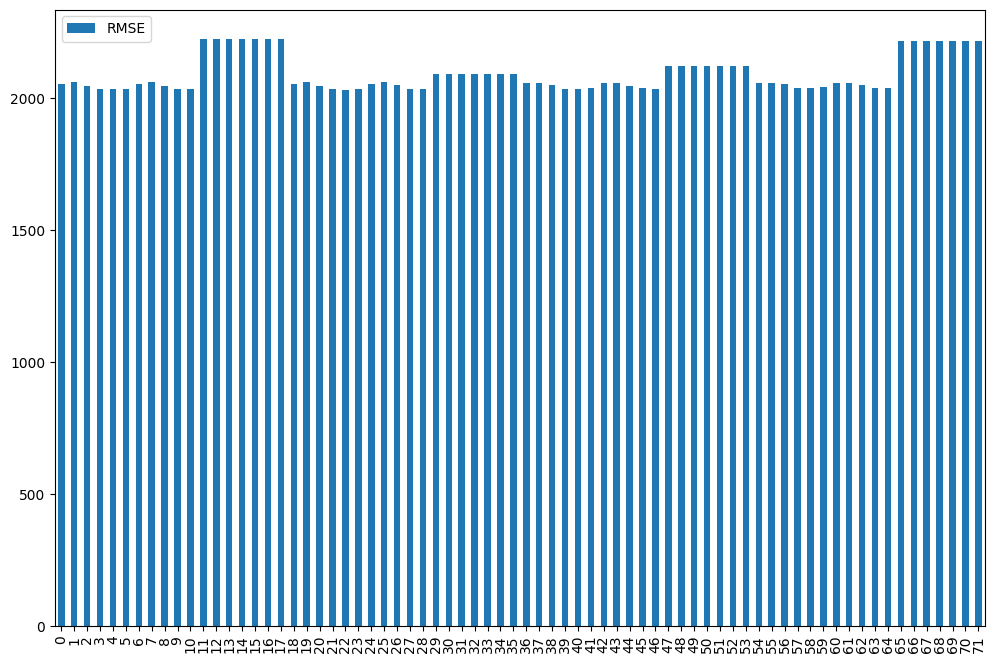

In [49]:
pred_df.plot(kind='bar', figsize=(12, 8))

### Explanation of Model Evaluation for Predicting `prep_time`

In this section of the code, we aim to predict the **preparation time** (`prep_time`) for an order, which is defined as:

\[
\text{prep\_time} = \text{delivery\_duration} - \text{estimated\_store\_to\_consumer\_driving\_duration} - \text{estimated\_order\_place\_duration}
\]

#### Key Components:

1. **Problem Definition**:
   - The goal of this part of the project is to predict the preparation time (`prep_time`) for an order.
   - `prep_time` is calculated by subtracting the `estimated_store_to_consumer_driving_duration` and `estimated_order_place_duration` from the `delivery_duration`.

2. **Feature Set**:
   - The feature set is determined by selecting the top 40 most important features based on **Gini importance**:
     - `selected_features_40`: This set contains the 40 most important features, which have been identified using the Gini-importance metric.

3. **Scalers**:
   - In this case, only the **Standard Scaler** is used for feature scaling:
     - **StandardScaler**: Standardizes the features by removing the mean and scaling to unit variance. Scaling is applied to improve model performance, but the choice of scaler is not crucial as long as it's applied consistently.

4. **Regression Models**:
   - The same set of regression models as in the previous sections is evaluated:
     - **Ridge Regression** (`Ridge`)
     - **Decision Tree Regressor** (`DecisionTree`)
     - **Random Forest Regressor** (`RandomForestRegressor`)
     - **XGBoost Regressor** (`XGBRegressor`)
     - **LightGBM Regressor** (`LGBMRegressor`)
     - **Multi-layer Perceptron Regressor** (`MLPRegressor`)

5. **Model Evaluation Loop**:
   The loop iterates over each combination of feature set, scaler, and regression model. The following steps are performed for each combination:
   
   1. **Feature Selection**: 
      - Only the features in the selected feature set (`selected_features_40`) are used.
      - The columns `estimated_store_to_consumer_driving_duration` are dropped because they are part of the target variable calculation and shouldn't be included as features.

   2. **Data Splitting**: 
      - The dataset is split into training and testing sets using `train_test_split`.
      - The indices of the training and testing sets are stored in `train_indices` and `test_indices` for later use.

   3. **Scaling**:
      - The features and target variable are scaled using the selected scaler (`StandardScaler`).
      - The scaled features are used to train the models.

   4. **Model Training and Evaluation**:
      - The model is trained using the scaled training data (`X_train_scaled`, `y_train_scaled`).
      - Predictions are made on the scaled test data (`X_test_scaled`).
      - The Root Mean Squared Error (RMSE) is calculated to evaluate the model's performance.

   5. **Inverse Scaling**:
      - Since the target variable (`prep_time`) was scaled, the predicted values are transformed back to their original scale using `rmse_with_inv_transform()`.

   6. **Results Recording**:
      - The model name, feature set, scaler name, and RMSE are recorded in the `pred_dict` dictionary.

#### Output:
After running this loop, the following information is stored in the `pred_dict` dictionary:
- **`regression_model`**: The name of the regression model being used (e.g., Ridge, Decision Tree, etc.).
- **`feature_set`**: The feature set used for training (e.g., selected top 40 features).
- **`scaler_name`**: The scaler used for preprocessing (e.g., StandardScaler).
- **`RMSE`**: The RMSE (Root Mean Squared Error) for the model on the test set, indicating the model's prediction accuracy for `prep_time`.

#### Example Use Case:
This loop helps to evaluate various models with the same set of features and preprocessing techniques to determine which combination provides the best prediction accuracy for the `prep_time`. This can be useful in selecting the best model for future predictions of order preparation times.

### How to Interpret the Results:
After the loop is complete, you can analyze the `pred_dict` dictionary to identify the model that performs the best. The model with the lowest RMSE across different feature sets and scalers is considered the most accurate model for predicting `prep_time`.


In [52]:
# change the problem as stated above

train_df["prep_time"] = train_df["delivery_duration"] - train_df["estimated_store_to_consumer_driving_duration"] - train_df["estimated_order_place_duration"]

# not scaling affects the performance so we will continue to scale but it doesn't really matter which scaler we use
scalers = {
    "Standard scaler": StandardScaler(),
}

feature_sets = {
    "selected_features_40": importances.sort_values(by='Gini-importance')[-40:].index.tolist(),
}

for featue_set_name in feature_sets.keys():
    feature_set = feature_sets[featue_set_name]
    for scaler_name in scalers.keys():
        print(f"-----scaled with {scaler_name}-------- included columns are {feature_set_name}")
        print("")
        for model_name in regression_models.keys():  
            #drop estimated_store_to_consumer_driving_duration and estimated_order_place_duration
            X = train_df[feature_set].drop(columns=["estimated_store_to_consumer_driving_duration"])
            y = train_df["prep_time"]
            
            # to get indices
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
            train_indices = X_train.index
            test_indices  = X_test.index
            
            # scale
            X_scaled, y_scaled, X_scaler, y_scaler = scale(scalers[scaler_name], X, y)
            
            # apply indexing
            X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)
            _, y_predict_scaled, _, _ = make_regression(X_train_scaled, y_train_scaled[:,0], X_test_scaled, y_test_scaled[:,0], regression_models[model_name], model_name, verbose=False)
            rmse_error, y_predict = rmse_with_inv_transform(y_scaler, y_test, y_predict_scaled, model_name)
            pred_dict["regression_model"].append(model_name)
            pred_dict["feature_set"].append(feature_set_name)
            pred_dict["scaler_name"].append(scaler_name)
            pred_dict["RMSE"].append(rmse_error)

-----scaled with Standard scaler-------- included columns are selected_features_10

Error = 2052.071533203125 in Ridge
Error = 2045.9086008875101 in DecisionTree
Error = 2039.3684918149186 in RandomForestRegressor
Error = 2032.8800048828125 in XGBoost
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019910 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1166
[LightGBM] [Info] Number of data points in the train set: 141656, number of used features: 39
[LightGBM] [Info] Start training from score -0.002301
Error = 2030.7421068399774 in LGBM
Error = 2031.1351318359375 in MLP


### Explanation of Model Evaluation for Predicting `prep_time` Using LightGBM Regressor

In this section of the code, we aim to predict the **preparation time** (`prep_time`) for an order. The target variable `prep_time` is calculated as follows:

\[
\text{prep\_time} = \text{delivery\_duration} - \text{estimated\_store\_to\_consumer\_driving\_duration} - \text{estimated\_order\_place\_duration}
\]

#### Key Components:

1. **Problem Definition**:
   - The goal here is to predict the **preparation time** (`prep_time`) for an order using a set of selected features.
   - `prep_time` is calculated as the difference between `delivery_duration`, `estimated_store_to_consumer_driving_duration`, and `estimated_order_place_duration`.

2. **Feature Set**:
   - The features are selected based on **Gini importance** from previous analyses:
     - `selected_features_40`: This set contains the 40 most important features, determined by their Gini importance score.

3. **Scalers**:
   - For scaling the features and target variable, we use the **StandardScaler**:
     - **StandardScaler**: Standardizes the data by removing the mean and scaling to unit variance.
   - Although scaling improves performance, the choice of scaler does not significantly impact the results, so we only use the **StandardScaler** here.

4. **Regression Model**:
   - We are using the **LightGBM Regressor** (`LGBMRegressor`) to predict the `prep_time`.
   - **LightGBM** is a gradient boosting framework that is well-suited for large datasets and typically performs well in terms of both accuracy and training time.

5. **Model Evaluation Loop**:
   This loop iterates over different combinations of feature sets, scalers, and models to train and evaluate the performance of the model. The steps performed in each iteration are as follows:

   1. **Feature Selection**: 
      - The feature set (`selected_features_40`) is used to select the top 40 most important features from the dataset.
      - The columns `estimated_store_to_consumer_driving_duration` are excluded from the features as they are part of the target variable (`prep_time`).

   2. **Data Splitting**:
      - The dataset is split into training and testing sets using `train_test_split`.
      - The indices of the training and testing data are stored in `train_indices` and `test_indices`.

   3. **Scaling**:
      - The features and the target variable (`prep_time`) are scaled using the **StandardScaler**. The target variable is scaled similarly to the features.
      
   4. **Model Training and Evaluation**:
      - The model is trained using the scaled training data (`X_train_scaled`, `y_train_scaled`).
      - Predictions are made on the scaled test data (`X_test_scaled`).
      - The **Root Mean Squared Error (RMSE)** is computed to assess the model's performance in predicting `prep_time`.

   5. **Inverse Scaling**:
      - Since the target variable (`prep_time`) is scaled, the predicted values are converted back to their original scale using the `rmse_with_inv_transform()` function.

   6. **Results Recording**:
      - The model name, feature set, scaler name, and RMSE are recorded in the `pred_dict` dictionary for each iteration.

#### Output:
After completing the loop, the `pred_dict` dictionary stores the following information for each model evaluation:
- **`regression_model`**: The name of the regression model being evaluated (in this case, **LightGBM**).
- **`feature_set`**: The feature set used in the model (e.g., top 40 most important features).
- **`scaler_name`**: The name of the scaler applied (e.g., StandardScaler).
- **`RMSE`**: The **Root Mean Squared Error (RMSE)** for the model on the test set, indicating the accuracy of the model's predictions for `prep_time`.

#### Example Use Case:
This section of the code helps evaluate the performance of the **LightGBM Regressor** on the `prep_time` prediction task. By systematically testing different feature sets and scalers, we can identify which combination provides the best prediction performance. The RMSE values allow us to compare the accuracy of predictions made by different configurations.

#### How to Interpret the Results:
Once the loop has finished running, the results can be analyzed by examining the **RMSE** values in the `pred_dict` dictionary. Th


In [54]:
# not scaling affects the performance so we will continue to scale but it doesn't really matter which scaler we use

scalers = {
    "Standard scaler": StandardScaler(),
}

feature_sets = {
    "selected_features_40": importances.sort_values(by='Gini-importance')[-40:].index.tolist(),
}

regression_models = {
    "LGBM": LGBMRegressor(),
}

for feature_set_name in feature_sets.keys():
    feature_set = feature_sets[feature_set_name]
    for scaler_name in scalers.keys():
        print(f"-----scaled with {scaler_name}-------- included columns are {feature_set_name}")
        print("")
        for model_name in regression_models.keys():  
            #drop estimated_store_to_consumer_driving_duration and estimated_order_place_duration
            X = train_df[feature_set].drop(columns=["estimated_store_to_consumer_driving_duration"])
            y = train_df["prep_time"]
            
            # to get indices
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
            train_indices = X_train.index
            test_indices  = X_test.index
            
            # scale
            X_scaled, y_scaled, X_scaler, y_scaler = scale(scalers[scaler_name], X, y)
            
            # apply indexing
            X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)
            _, y_predict_scaled, _, _ = make_regression(X_train_scaled, y_train_scaled[:,0], X_test_scaled, y_test_scaled[:,0], regression_models[model_name], model_name, verbose=False)
            rmse_error, y_predict = rmse_with_inv_transform(y_scaler, y_test, y_predict_scaled, model_name)
            pred_dict["regression_model"].append(model_name)
            pred_dict["feature_set"].append(feature_set_name)
            pred_dict["scaler_name"].append(scaler_name)
            pred_dict["RMSE"].append(rmse_error)

-----scaled with Standard scaler-------- included columns are selected_features_40

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019664 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1166
[LightGBM] [Info] Number of data points in the train set: 141656, number of used features: 39
[LightGBM] [Info] Start training from score -0.002301
Error = 2030.7421068399774 in LGBM


### Extracting Predictions for the Best Performing Model

In this section, we extract the predictions for the **preparation duration** (`prep_duration_prediction`) using the best-performing model. The `pred_values_dict` dictionary stores the actual and predicted values, which can later be used for further analysis or evaluation.

#### Key Components:

1. **Predicted and Actual Values**:
   - **`actual_total_delivery_duration`**: This stores the actual delivery duration (`delivery_duration`) from the test set. It represents the ground truth against which we will compare the predictions.
   - **`prep_duration_prediction`**: This stores the predicted preparation duration (`prep_time`) obtained from the model predictions. It represents the model's forecast of the preparation time for each order.
   - **`estimated_store_to_consumer_driving_duration`**: This stores the estimated store-to-consumer driving duration for each order in the test set. This is part of the input features used to calculate `prep_time`.
   - **`estimated_order_place_duration`**: This stores the estimated order placement duration for each order in the test set. It is also an input feature used in the calculation of `prep_time`.

2. **Data Storage**:
   The dictionary `pred_values_dict` is created to store these values in a structured way. The values for the actual and predicted preparation duration, as well as the estimated durations, are stored for each entry in the test set based on their respective indices (`test_indices`).

#### Example Use Case:
This step helps to extract and store the actual and predicted values for analysis or reporting. By comparing the predicted `prep_duration_prediction` with the actual `delivery_duration`, we can assess the model's accuracy and gain insights into its performance. These values can be used in post-processing, for visualizations, or for reporting purposes.

#### Explanation of Columns in `pred_values_dict`:
- **`actual_total_delivery_duration`**: Actual delivery time for the orders in the test set.
- **`prep_duration_prediction`**: Predicted preparation time (i.e., the difference between `delivery_duration` and other factors such as driving and order placement duration).
- **`estimated_store_to_consumer_driving_duration`**: The predicted time it would take for the store-to-consumer driving, which is part of the model's inputs.
- **`estimated_order_place_duration`**: The predicted time it would take for placing the order, also part of the input features.

This dictionary can later be used to assess model accuracy, calculate residuals, or create comparison plots.


In [56]:
# choosing the best performing model and extract predictions fro preparation duration

pred_values_dict = {
    "actual_total_delivery_duration": train_df["delivery_duration"][test_indices].values.tolist(),
    "prep_duration_prediction": y_predict[:, 0].tolist(),
    "estimated_store_to_consumer_driving_duration": train_df["estimated_store_to_consumer_driving_duration"][test_indices].values.tolist(),
    "estimated_order_place_duration": train_df["estimated_order_place_duration"][test_indices].values.tolist(),
}

### Converting Predictions to DataFrame

In this step, we convert the dictionary `pred_values_dict` into a Pandas DataFrame for better analysis and visualization. This allows us to organize and manipulate the actual and predicted values in a tabular format.

#### Key Steps:
- **`pd.DataFrame(pred_values_dict)`**: This creates a DataFrame from the `pred_values_dict` dictionary. Each key in the dictionary corresponds to a column, and the values (lists) are the rows in that column.
  
#### DataFrame Columns:
The resulting DataFrame `values_df` will contain the following columns:
1. **`actual_total_delivery_duration`**: Actual delivery duration from the test data.
2. **`prep_duration_prediction`**: The predicted preparation duration from the selected regression model.
3. **`estimated_store_to_consumer_driving_duration`**: Estimated time for driving from the store to the consumer.
4. **`estimated_order_place_duration`**: Estimated time for placing the order.

The DataFrame provides a comprehensive view of the prediction results, allowing for easy comparison of the actual and predicted values.

#### Example Use Case:
This DataFrame can be used for:
- **Performance evaluation**: Comparing actual and predicted values for the preparation duration.
- **Error analysis**: Calculating the residuals (difference between actual and predicted values).
- **Reporting**: Exporting to CSV or visualizing using graphs like scatter plots or histograms.

The DataFrame `values_df` will help you analyze the prediction results and assess the performance of the chosen model.


In [57]:
# convert to dataframe
values_df = pd.DataFrame(pred_values_dict)
values_df

,actual_total_delivery_duration,prep_duration_prediction,estimated_store_to_consumer_driving_duration,estimated_order_place_duration
0,2448.0,1709.717097,380.0,251.0
1,1839.0,1520.342237,747.0,446.0
2,1927.0,2212.427327,543.0,251.0
3,2657.0,1243.171872,445.0,251.0
4,3596.0,1890.335601,691.0,446.0
...,...,...,...,...
35409,9557.0,2698.254848,768.0,446.0
35410,1864.0,2097.310719,324.0,446.0
35411,2674.0,1908.107952,791.0,251.0
35412,2234.0,1876.590902,687.0,251.0


### Summing Predictions with No Preparation Activities

In this step, we compute the total delivery duration by adding the predicted preparation time to the estimated times for the store-to-consumer driving and order placement activities. This step is done to verify if the sum of the predicted preparation duration and the estimated driving and order placement times closely matches the actual total delivery duration.

#### Key Steps:
- **`values_df["sum_total_delivery_duration"]`**: This new column is calculated by summing the following three columns:
  1. **`prep_duration_prediction`**: The predicted preparation time (from the model).
  2. **`estimated_store_to_consumer_driving_duration`**: The estimated store-to-consumer driving duration.
  3. **`estimated_order_place_duration`**: The estimated order placement duration.

The formula for the new column is:
```python
values_df["sum_total_delivery_duration"] = values_df["prep_duration_prediction"] + values_df["estimated_store_to_consumer_driving_duration"] + values_df["estimated_order_place_duration"]


In [58]:
# sum predictions with no preparation activities such as order placing and driving
values_df["sum_total_delivery_duration"] = values_df["prep_duration_prediction"] + values_df["estimated_store_to_consumer_driving_duration"] + values_df["estimated_order_place_duration"]
values_df

,actual_total_delivery_duration,prep_duration_prediction,estimated_store_to_consumer_driving_duration,estimated_order_place_duration,sum_total_delivery_duration
0,2448.0,1709.717097,380.0,251.0,2340.717097
1,1839.0,1520.342237,747.0,446.0,2713.342237
2,1927.0,2212.427327,543.0,251.0,3006.427327
3,2657.0,1243.171872,445.0,251.0,1939.171872
4,3596.0,1890.335601,691.0,446.0,3027.335601
...,...,...,...,...,...
35409,9557.0,2698.254848,768.0,446.0,3912.254848
35410,1864.0,2097.310719,324.0,446.0,2867.310719
35411,2674.0,1908.107952,791.0,251.0,2950.107952
35412,2234.0,1876.590902,687.0,251.0,2814.590902


### Evaluating the Model Performance using RMSE

To assess the performance of the model, we compute the Root Mean Squared Error (RMSE) between the **actual total delivery duration** and the **sum of predicted total delivery duration**. The RMSE is a commonly used metric to evaluate the accuracy of regression models, where lower RMSE indicates better model performance.

In this case:
- **`values_df["actual_total_delivery_duration"]`**: The actual delivery time (ground truth).
- **`values_df["sum_total_delivery_duration"]`**: The predicted total delivery time, which is the sum of predicted preparation time and estimated store-to-consumer driving and order placement times.

#### Code:
```python
mean_squared_error(values_df["actual_total_delivery_duration"], values_df["sum_total_delivery_duration"], squared=False)


In [59]:
mean_squared_error(values_df["actual_total_delivery_duration"], values_df["sum_total_delivery_duration"], squared=False)

2030.7421068399774

### Data Preparation for Predicting Total Delivery Duration

In this cell, we are preparing the data to predict the total delivery duration (`actual_total_delivery_duration`) using other features such as:

- `prep_duration_prediction`: Predicted preparation time.
- `estimated_store_to_consumer_driving_duration`: Estimated time for driving from the store to the consumer.
- `estimated_order_place_duration`: Estimated time for placing the order.

We define `X` as the features (the columns: `prep_duration_prediction`, `estimated_store_to_consumer_driving_duration`, `estimated_order_place_duration`) and `y` as the target variable (`actual_total_delivery_duration`). Then, we split the data into training and testing sets using `train_test_split` to evaluate the performance of the regression models later.

The data is split such that 80% of the data is used for training and 20% for testing.


In [60]:
# what if we use another regression model to get the total delivery duration
X = values_df[["prep_duration_prediction", "estimated_store_to_consumer_driving_duration", "estimated_order_place_duration"]]
y = values_df["actual_total_delivery_duration"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Model Evaluation: Predicting Total Delivery Duration

In this code block, we are evaluating several regression models to predict the **total delivery duration**. The models tested are:

1. **Linear Regression** (`LinearReg`)
2. **Ridge Regression** (`Ridge`)
3. **Decision Tree Regressor** (`DecisionTree`)
4. **Random Forest Regressor** (`RandomForest`)
5. **XGBoost Regressor** (`XGBoost`)
6. **LightGBM Regressor** (`LGBM`)

We use the following features for the prediction:

- `prep_duration_prediction`
- `estimated_store_to_consumer_driving_duration`
- `estimated_order_place_duration`

### Workflow:
1. **Feature Set and Target Variable**: 
    - The feature set `X` includes the predicted preparation duration, estimated store-to-consumer driving time, and order placing time.
    - The target variable `y` is the actual total delivery duration.

2. **Model Training and Prediction**: 
    - For each model in the `regression_models` dictionary, the model is trained using the training dataset (`X_train`, `y_train`).
    - After training, predictions are made on the test set (`X_test`), and the RMSE is computed by comparing the predicted (`y_predict`) and actual (`y_test`) values.

3. **RMSE Calculation**: 
    - **Root Mean Squared Error (RMSE)** is calculated to evaluate the model performance. The lower the RMSE, the better the model has performed in predicting the total delivery duration.

By running this loop, we get the RMSE values for all six models, helping us assess which model performs the best.


In [62]:
regression_models = {
    "LinearReg": linear_model.LinearRegression(),
    "Ridge": linear_model.Ridge(),
    "DecisionTree": tree.DecisionTreeRegressor(),
    "RandomForest": RandomForestRegressor(),
    "XGBoost": XGBRegressor(),
    "LGBM": LGBMRegressor()
}

for model_name in regression_models.keys():
    _, y_predict, _, _ = make_regression(X_train, y_train, X_test, y_test, regression_models[model_name], model_name, verbose=False)
    print("RMSE of:",model_name, mean_squared_error(y_test,y_predict, squared=False))

RMSE of: LinearReg 975.7419941894962
RMSE of: Ridge 975.7419941924371
RMSE of: DecisionTree 1392.1738166992175
RMSE of: RandomForest 1303.9475025421475
RMSE of: XGBoost 1030.3433569401623
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000171 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 519
[LightGBM] [Info] Number of data points in the train set: 28331, number of used features: 3
[LightGBM] [Info] Start training from score 2869.174261
RMSE of: LGBM 1032.9558286360723


### Model Evaluation Results

Here are the Root Mean Squared Error (RMSE) values for each regression model used to predict the **total delivery duration**:

1. **Linear Regression (LinearReg)**:  
   RMSE = 975.74  
   - The Linear Regression model performs relatively well, with the smallest RMSE value.

2. **Ridge Regression (Ridge)**:  
   RMSE = 975.74  
   - The Ridge Regression model performs similarly to Linear Regression, indicating that regularization has not significantly improved the performance over the simple linear model.

3. **Decision Tree Regressor (DecisionTree)**:  
   RMSE = 1392.17  
   - The Decision Tree model performs worse than Linear and Ridge Regression, likely due to overfitting or insufficient tuning of hyperparameters.

4. **Random Forest Regressor (RandomForest)**:  
   RMSE = 1303.95  
   - Random Forest also shows worse performance compared to the linear models, possibly due to model complexity or hyperparameter settings.

5. **XGBoost Regressor (XGBoost)**:  
   RMSE = 1030.34  
   - XGBoost performs better than Decision Tree and Random Forest, but still not as well as the linear models.

6. **LightGBM Regressor (LGBM)**:  
   RMSE = 1032.96  
   - The LightGBM model, while slightly worse than XGBoost, still performs better than the more complex tree-based models like Decision Tree and Random Forest.

### Conclusion:
- The **Linear Regression** and **Ridge Regression** models outperform the more complex models such as Decision Tree, Random Forest, XGBoost, and LightGBM, in terms of RMSE.
- Further tuning and hyperparameter optimization may improve the performance of the tree-based models, but for now, linear models appear to be the best choice for predicting the total delivery duration.
